Przewidywanie i utrzymywanie odpowiedniego stanu magazynowego produktów  
==============

**Autorzy:** *Dworaczyk Marek* i *Czech Piotr*

<br><br>

# Spis treści

1. Wprowadzenie <br>
1.1. Motywacja <br>
1.2 Sformułowanie problemu <br>
1.2.1 Zwiększanie stanu <br>
1.2.2 Zmniejszanie stanu <br>
1.2.3 Równanie zmiany stanu
1.2.4 Polityka uzupełnień
1.2.5 Podsumowanie
2. Zerowy czas dostawy, $\tau = 0$
2.1. Zauważmy!
2.2 Podejście numeryczne
2.2.1 Metoda Eulera
2.2.1.1 Jawna
2.2.1.2 Niejawna
2.2.2 Algorytm Rungego-Kutty IV rzędu
2.3 Podejście analityczne
2.3.1 Porównanie
2.3.2 Charakterystyka rozwiązania
2.3.2.1 Ile towaru zamówić?
2.3.2.2 Kondycja magazynu
2.3.2.3 Zamawianie towaru
2.3.2.4 Rozwój
3. Niezerowy czas dostawy, $\tau \gt 0$
3.1 Rozwiązanie numeryczne
3.1.1 Metoda Eulera jawna
3.1.2 Metoda Runny-Kuttego
3.2 Przybliżone równanie analityczne
3.2.1 Rozwiazanie dla $t \in [0, \tau]$
3.2.2 Rozwiązanie dla $t \in [\tau , \infty]$
3.2.3 Dopasowywanie wyników
3.2.4 Wykres analityczny
4. Podsumowanie
5. Literatura

<br><br>

# Wprowadzenie

## Motywacja

Przedmiotem naszych badań został magazyn, czyli serce całego organizmu dostaw i podstawa logistyki. Jest on miejscem kluczowym i elementarnym przy kupowaniu, wysyłaniu czy dostarczaniu jakichkolwiek produktów. Na łamach tej pracy chcielibyśmy się przyjrzeć politykom uzupełnien magazynu oraz czynnikom, które wpływają na stan magazynowy produktu. Zrobimy to wszystko, aby końcowo przedstawić matematyczną propozycję, jak utrzymywać odpowiedni stan magazynowy produktu. Wiemy, że w tej dziedzinie każda godzina ma znaczenie, dlatego odpowiednie planowanie dostaw i zamówień - tak, aby odpowiednie produkty zawsze były w określonym stanie, ma olbrzymie znaczenie - bo często nie mówimy tu o godzinach opóźnień, ale <i>dniach</i>.
<br>

Całość naszej pracy rozpoczeniemy od próby matematycznego opisania czynników wpływających na stan produktu. Dodatkowo w tak skomplikowanych środowiskach logistycznych, jak magazyn, ważnym czynnikiem jest też dobranie odpowiedniej strategii uzupełnień i planowania dostaw, aby nie zamawiać wszystkiego na raz. Poruszymy zatem po krótce polityki uzupełnień magazynu, w tym wybrany przez nas schemat, aby praca ta była dla czytelnika maksymalnie klarowna odnośnie poruszanej zawartości.
<br>

Naszym celem będzie stopniowe analizowanie bardziej złożonego problemu i wzięcie pod uwagę trafniej dostosowanych parametrów równania. Natomiast zaczniemy od najprostrzego ujęcia problemu. To, co uważamy za istotne to nie stworzenie długiego i przekomplikowanego modelu, a znalazienie schematu, który pozwoli nam <i>dostatecznie dobrze</i> przybliżać oczekiwane przez nas wartości. 
<br>

Naukowym punktem wyjścia została dla nas praca autorstwa Arpad Gy. T. Csik, Tamas L. Horvath i Peter Foldesi pod tytułem "An Approximate Analytic Solution of the Inventory Balance Delay Differential Equation"$^{[1]}$, która pomogła nam dostrzeć oraz zrozumieć podstawowe problemy i zagadnienia podczas poruszania się w temacie planowania dostaw na magazynie. Sama praca jest również analizą różnych podejść do tego samego problemu, dlatego zaciekawionych zachęcamy do źródła.
<br>

## Sformułowanie problemu

### Zwiększanie stanu

Magazyn kojarzy nam się pierwszorzędnie z <i>przechowywaniem</i> wskazanych rzeczy. Na moment pisania tej pracy teleportacja jeszcze nie jest możliwa, a więc, aby przedmiot pojawił się w magazynie, musi być: zamówiony i przyjęty. Mówiąc <i>"przyjęty"</i>, tak naprawdę cicho założyliśmy jeszcze jeden czynnik - ten produkt musi być zamówiony i dostarczony, co kolejno prowadzi nas do konkluzji, że każdy towar ma <b>pewien czas dostawy $\tau \in \mathbb{N}$</b>. Podsumowując, określimy sobie pewną funkcję dostawy $R$ (receive):

$$
\tag{1}
R = R(t) : t \in [0, \infty),
$$ 

która będzie informować nas o wielkości dostawy w dowolnie podanej chwili $t$. Wracając do wyszczególnionego procesu, mamy:
1. zamówienie
2. dostarczanie
3. przyjęcie

funkcja $R$ określiła nam proces przyjęcia. Zdefiniujmy teraz proces <i>zamówienia</i>:

$$
\tag{2}
O = O(t) : t \in \mathbb{R}.
$$

Dzięki tym definicjom i wykorzystaniu brakującego etapu dostarczania produktu, którego dostawa zajmuje czas, ponieważ kurier musi do nas dotrzeć - opisujemy proces dostaw następująco: 

$$
\tag{3}
R(t) = O(t - \tau) : t,\tau \in [0, \infty)
$$

Takie zabiegi pozwoliły nam opisać sytuację życiową: jeśli przykładowo $\tau = 2\ [dni]$ to zamawiając w poniedziałek ($t=1$) 16 sztuk towaru $O(1) = 16$ to dopiero w środę ($t=3$):

$$
R(3) = O(t - \tau) = O(3 - 2) = O(1) = 16,
$$

odnujemy zwiększenie się towaru na podstawie poniedziałkowego zamówienia.

### Zmniejszanie stanu

Nasz towar na magazynie zmniejszy się tylko w momencie, gdy znajdzie się na niego chętny i go zamówi. Jest to sytuacja prostsza, bo nas jako zarządzających i odpowiadających za stan produkt na tym etapie nie interesuje <i>ile towar będzie dostarczany do klienta</i>. Ważne jest dla nas, ile sztuk musimy wydać dzisiejszego dnia z magazynu, zatem określimy sobie funkcję wysyłki / zapotrzebowania $D$ (demand):

$$
\tag{4}
D = D(t) : t \in [0, \infty).
$$

Dla uproszczenia w pierwotnym schemacie przyjmiemy, że częstotliwość zamówien jest stała każdego dnia, a więc:

$$
\begin{equation}
\tag{5}
D(t) = \begin{cases} 
      0 & \text{dla } t \lt 0 \\
      D_0 & \text{dla } t \geq 0 
   \end{cases},\ \text{gdzie } D_0 \in \mathbb{N}.
\end{equation}
$$


### Równanie zmiany stanu

Zdefiniowaliśmy dwa niezbędne i podstawowe procesy: wydawanie i przyjęcie. Do opisania świata brakuje nam tylko definicji <i>ile towaru posiadamy na półce</i>. Zatem, chcielibyśmy określić funkcję stanu magazynowego $I$ (inventory):

$$
\tag{6}
I = I(t) : t \in [0, \infty),
$$

która wskazuja nam ilość produktu na magazynie - jego <b>stan magazynowy</b>. Dodatkowo, nie zakładamy, że podczas analizy nasz magazyn musi być na starcie pusty, ponieważ w realnym świecie cięzko, abyśmy najpierw opróżnili cały magazyn, a później starali się wprowadzić nowe procesy - musi to być jak najbardziej możliwe płynne przejście, zatem definiujemy warunek początkowy:

$$
\tag{7}
I(0) = I_0 : I_0 \in \mathbb{N} \cup \{0\}.
$$

Dzięki temu możemy teraz opisać cały ten proces. Równanie opisujące zmianę stanu magazynowego produktu:

$$
\begin{equation} 
\tag{8}
\frac{dI}{dt} = R(t) - D(t) : t \in [0, \infty),
\end{equation}
$$

danego dnia nasz stan magazynowy powiększy się o towar przyjęty, a zmniejszy się o towar wysłany.

### Polityka uzupełnień

Zanim zdecydujemy się zapisać w kodzie powyższe równanie, musimy przyjąć pewną strategię działania funkcji $O(t)$, ponieważ na ten moment jest to nasza jedyna niewiadoma. Tak, jak wspominaliśmy na początku technik i polityk uzupełniania magazynu jest wiele. 
Można by wspomnieć o polityce Reorder-point $^{[2]}$, która polega na składaniu zamówień uzupełniających stan magazynu w chwili kiedy spadnie on poniżej określonego poziomu. Dla nas nie byłaby to dobra polityka do przyjęcia, gdyż uzupełnienia byłyby składane w różnych odstępach czasowych co utrudniałoby dokładną analizę i symulację.

Bardziej odpowiednim sposobem zarządzania magazynem jest tzw. Periodic-review $^{[2]}$, gdzie za taktykę przybiera się okresowe sprawdzanie stanu magazynu
i domawianie takiej ilości produktu, ile brakuje by osiągnąć nasz oczekiwany stan zwany <i>safety-stock</i>. U nas określimy go jako $I_t \in \mathbb{N}$. Naszą wspomnianą już funkcję $O(t)$ możemy zatem określić jako:

$$
\begin{equation}
\tag{9}
O(t)=\frac{I_t - I(t)}{T} 
\end{equation}
$$
gdzie wartość $T \in \mathbb{N}$ jest tak zwanym kontrolerem, lub "czasem regulacji". Jest on użyty z tego powodu, że zamówienie całego deficytu w jednym okresie czasowym może być nieefektywną praktyką $^{[3]}$.

### Podsumowanie

W tym momencie potrafimy już podstawowo opisać świat magazynu, który nas otacza, zatem przypomnijmy sobie nasze komponenty:
* $I(t)$ - <i>inventory value</i> - stan magazynowy w chwili $t$,
* $D(t)$ - <i>demand rate</i> - wielkość zamówień w chwili $t$,
* $O(t)$ - <i>orders rate</i> - ilość zamówionych sztuk produktu w chwili $t$,
* $R(t)$ - <i>receive rate</i> - ilość otrzymanych sztuk produktu w chwili $t$.

# Zerowy czas dostawy, $\tau = 0$

## Zauważmy! 

Zgodnie z przyjętą ideą rozpoczniemy od maksymalnego uproszczenia naszego schematu. W takim przypadku uznajemy, że znaleźliśmy firmę kurierską z <a href="https://www.post.japanpost.jp/service/you_pack/current_day_en.html">przyszłości</a>$^{[4]}$, która pozwala nam dostarczać zamówiony towar od ręki, tzn. nie posiadamy opóźnienia dostawy zatem $\tau = 0$.

W takim podejściu nasza wielkość przyjęć, czyli <i>receive rate</i> staje się jednoznaczny z wielkością zamówień <i>orders rate</i>, co możemy prosto wyrazić zapisem:

$$
\tag{10}
R(t) = O(t - 0) = O(t) : t \in [0, \infty).
$$

Cała sytuacja staje się dla nas o tyle ważna i ciekawa, że przy wybranej przez nas polityce uzupełnień przekształca to równanie (8) do następującej postaci:

$$
\begin{align*}
\frac{dI}{dt} &= R(t) - D(t) \\
&= O(t) - D_0 \\
&= \frac{I_t - I(t)}{T} - D_0.
\tag{11}
\end{align*}
$$

Sytuacja jest fantastyczna! Cały nasz problem w tym momencie sprowadził się do równania różniczkowego 1 rzędu.

Dzięki temu na ten moment posiadamy równanie zwyczajne pierwszego rzędu, któremu chcielibyśmy przyjrzeć się trochę bliżej. Przyjęty przez nas plan działania jest następujący:
1. spróbujemy rozwiązać problem numerycznie za pomocą algorytmów Eulera (metody jawnej i niejawnej),
2. spróbujemy rozwiązać problem numerycznie z pomocą algorytmu Rungego-Kutty,
3. rozwiążemy równanie analitycznie oraz przyjrzymy się trochę charakterystyce rozwiązania.


## Podejście numeryczne

### Metoda Eulera

Pierwszym narzędziem, które wykorzystamy do walki z otrzymanym równaniem (11) będą metody Eulera. Służą one do rozwiązywania równań różniczkowych postaci

$$
\tag{12}
\frac{dy}{dx} = f(x,y) \text{, gdzie } y(x_0) = y_0
$$

gdzie $y(x_0)$ jest warunkiem początkowym $^{[5]}$.<br>

Następnie wprowadzamy pewną siątkę podziału $x_n = nh$, $h$ gdzie $h \gt 0$.

Dzięki nałożeniu tej siatki oraz użyciu paru przybliżeń w metodzie jawnej Eulera otrzymujemy rekurencyjny wzór na kolejne wartości $y$.

$$
\tag{13}
y_n = y_{n - 1} + hf(x_{n - 1}, y_{n - 1}).
$$

Poniższa grafika w świetny sposób pokazuje jak zwiększanie elementu $h$ będzie prowadziła do dokładniejszego działania metody:

<center>
<img src="https://phys23p.sl.psu.edu/~mrg3/mathanim/diff_equ/stepeuler.gif">
<p>Źródło [6]</p>
</center>

Istnieje również niejawna metoda Eulera, która wyraża się następująco:

$$
\tag{14}
y_n = y_{n - 1} + hf(x_n, y_n).
$$

Podstawowa róznica między tymi sposobami jest taka, że wartości w tej pierwszej liczmy <i>naprzód</i>, natomiast w metodzie niejawnej - <i>w tył</i>.


#### Jawna

Zaczniemy od implementacji jawnej metody eulera. Zgodnie z powyższymi definicjami (12) i (13) zaimplementujemy obliczanie kolejnych wartości y za pomocą funkcji:

In [1]:
"""
    solve_by_forward_euler(f::Function, y₀::Number, x₀::Int, xₙ::Int, h::Float64)

Solves an ordinary differential equation using the forward Euler method.

Parameters:
- `f`: Function representing the derivative function: y'(x) = f(x, y)
- `y₀`: Initial condition
- `x₀`: Lower bound for x, where x ∈ [x₀, xₙ]
- `xₙ`: Upper bound for x, where x ∈ [x₀, xₙ] 
- `h`: Step size

Returns:
- `x_values`: Array with x values corresponding to each step.
- `y_values`: Array with approximated values of the given function.
"""
function solve_by_forward_euler(
    f::Function,
    y₀::Number,
    x₀::Int,
    xₙ::Int,
    h::Float64
)::Tuple{Vector{Float64}, Vector{Float64}}
    n = round(Int, (xₙ - x₀) / h)

    y_values = zeros(n + 1)
    x_values = zeros(n + 1)

    x_values[1] = x₀
    y_values[1] = y₀

    for index in 1:n
        x_values[index + 1] = x_values[index] + h
        y_values[index + 1] = y_values[index] + h * f(x_values[index], y_values[index])
    end

    return x_values, y_values
end

solve_by_forward_euler

Przy implementacji zdecydowaliśmy się na to, aby metoda umożliwiała rozwiązanie funkcji dla dowolnego zakresu $x \in [x_0, x_n]$. Następnie po podaniu funkcji $f$, parametru początkowego, parametru $h$ oraz granic zakresu dla wartości $x$, implementujemy właściwy algorytm. Początkowo wyliczamy liczbę do przejścia po naszej "siatce", tworzymy na jej podstawie dwie nowe puste tablice ze wskazaną długością - jedna dla zapamiętywania argumentów $x$, druga dla wartości $y$. W ostatnim etapie w ramach implementacji zdecydowaliśmy się <i>przesunąć</i> o jeden indeks do przodu względem pierwotnej formuły

$$
\tag{15}
y_{k + 1} = y_{k} + hf(x_{k}, y_{k}) \text{, gdzie } k = n - 1
$$

<br>

Pozostało sprawdzić owoce zaimplementowanej funkcji na przykładzie naszego modelu, przypomnijmy zatem równanie (8):

$$
\tag{16}
\frac{dI}{dt} = \frac{I_t - I(t)}{T} - D_0 \text{, gdzie } I_t,\ T,\ D_0 \in \mathbb{N}.
$$

W ramach schematu Eulera powyższe równanie zmieniamy tak, aby zależne było od $I$ oraz $t$

$$
\tag{17}
f(t, I) = \frac{I_t - I}{T} - D_0,
$$

co przekłada się na równoznaczny zapis w Julii:


In [2]:
"""
    get_f(Iₜ, T, D₀)

Returns a f(t, I) function of our inventory model equation.

Parameters:
- `Iₜ`: Target value.
- `T`: Order policy controller value
- `D₀`: Delivery constant.

Returns:
- A function f(t, I)
"""
function get_f(Iₜ::Int, T::Int, D₀::Int)::Function
    return function(t, I)
        if (t < 0)
            return -D₀
        else
            return ((Iₜ - I) / T) - D₀ 
        end
    end
end


get_f

W powyższej implementacji wykorzystaliśmy paradygmat closures programowania funkcyjnego. Głównym powodem było wymaganie, aby wszystkie używane przez nas stałe były zawsze zrozumiałe i nie powodowały konfliktu z zasięgiem zmiennych. Dodatkowo, aby móc korzystać z dość abstrakcyjnie zdefiniowanej funkcji `solve_by_forward_euler` nie chcieliśmy sztucznie dodawać parametrów do funkcji $f$. Ten zapis, jak i paradygmat pozwala nam pogodzić nasze wymagania matematyczne wraz z przejrzystą i poprawną implementacją programistyczną.

Dodatkowo dodaliśmy warunek dla $t<0$, który zabiera czynnik przyjęć, ponieważ w naszej analizie nie umiemy przyjąć towaru wstecz. Może wydawać się, że warunek i tak nigdy nie zostanie spełniony, lecz zostanie to uzasadnione w dalszej części pracy.

Uf... najcięższe chyba za nami, zatem przejdźmy do konkretów - hurtowo sprzedajemy czarne skarpety z bawełny. Początkowo na magazynie posiadamy ich 20, na jednostkę czasu sprzedajemy ich 12 (tak, są to świetne skarpety). Z racji, że dopiero rozpoczynamy nasz świetny biznes, wszystko trzymamy w garażu gdzie miejsce jest ograniczony, więc maksymalnie możemy upakować 30 skarpetek. Kontroler w polityce uzupełnień ustawimy w tym momencie na 2 (w dalszej części poznamy skutki tego wyboru!). Więc do dzieła:

In [3]:
I₀ = 20 # socks on start 
D₀ = 12 # demand on our socks
Iₜ = 30 # stock inventory limit
T = 2 

f = get_f(Iₜ, T, D₀)

#9 (generic function with 1 method)

Przekuliśmy w tym momencie fakty otrzymane od klienta w zaimplementowany model, który teraz możemy spróbować przybliżyć dla pierwszych 15 dni sprzedaży:

In [4]:
using Plots

day_start = 0
day_end = 15

15

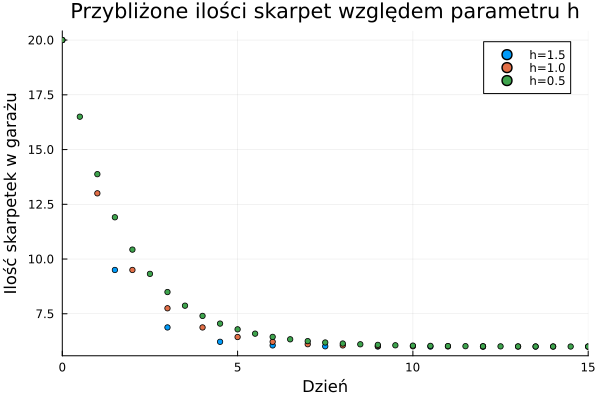

In [5]:
x_values_h1, y_values_h1 = solve_by_forward_euler(f, I₀, day_start, day_end, 1.5)
x_values_h2, y_values_h2 = solve_by_forward_euler(f, I₀, day_start, day_end, 1.0)
x_values_h3, y_values_h3 = solve_by_forward_euler(f, I₀, day_start, day_end, 0.5)

scatter(x_values_h1, y_values_h1, label="h=1.5", markersize=3, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Przybliżone ilości skarpet względem parametru h", grid=true, xlims=(day_start, day_end))
scatter!(x_values_h2, y_values_h2, label="h=1.0", markersize=3)
scatter!(x_values_h3, y_values_h3, label="h=0.5", markersize=3)

Sukces! Na tym etapie możemy poczynić dodatkową obserwację, parametr $h$ ma ogromne znaczenie dla dokładności naszego rozwiązania numerycznego

#### Niejawna

Przypomnij schemat (14) na wyznaczanie kolejnych przybliżeń w metodzie niejawnej.

$$
\tag{18}
y_n = y_{n - 1} + hf(x_n, y_n).
$$

Od razu widzimy, że wyrażenie to jest trochę bardziej wymagające, ponieważ wyznaczając element $y_n$ pojawia się on również po prawej stronie. Trudniej nam tutaj od razu zaimplementować abstrakcyjne podejście, tak jak zrobiliśmy to przy funkcji `solve_by_forward_euler`, ale nie jest to przeszkoda, która nas powstrzyma. Użyjmy tego schematu do naszego równania, mamy więc

$$
\tag{19}
I_n = I_{n - 1} + hf(t_n, I_n) \text{, gdzie } f(t, I) = \frac{I_t - I}{T} - D_0 
$$

Podstawiamy zatem rezultat naszej funkcji $f$ dla parametrów $t_n$ oraz $I_n$ i otrzymujemy

$$
\tag{20}
I_n = I_{n - 1} + h \cdot (\frac{I_t - I_n}{T} - D_0).
$$

Ta wersja jest dla nas dogodniejsza, ponieważ prostymi przekształceniami algebraicznymi możemy uzyskać $I_n$ tylko po jednej stronie równania. Zatem dokonajmy paru transformacji, pamiętajac o naszym celu - czyli $I_n$ na jedną stronę równania.

Rozpoczynamy od mnożenia obustronnie przez $T$ i przeniesienie czynnika $I_n$

$$
TI_n = TI_{n - 1} + hI_t - hI_n - hTD_0
$$

$$
TI_n + hI_n = TI_{n - 1} + hI_t - hTD_0.
$$

Wyciągamy wspólne czynniki przed nawias

$$
I_n(T + h) = TI_{n - 1} + h(I_t - TD_0).
$$

Co pozwala zrealizować nasz pierwotny cel

$$
I_n = \frac{T \cdot I_{n - 1} + h(I_t - TD_0)}{T + h} \text{, gdzie } h \in [0, \infty), \ D_0,T,I_t \in \mathbb{N}.
$$

Dla uproszczenia implementacji algorytmu ponownie skorzystamy z podstawienia $k = n - 1$ otrzymując

$$
\tag{21}
I_{k + 1} = \frac{T \cdot I_{k} + h(I_t - TD_0)}{T + h}
$$

Zauważmy, że możemy podejść do tego trochę bardziej abstrakcyjnie

$$
\tag{22}
I_{k + 1} = \frac{T}{T + h}I_{k}  +  \frac{(I_t - TD_0)}{T + h}h,
$$

czyli

$$
\tag{23}
I_{k + 1} = {A}I_{k} + {B} \text{, gdzie } {A}, {B} \in \mathbb{R}.
$$

Zaimplementujmy zatem funkcję `solve_by_backward_euler` na podstawie tych wniosków


In [6]:
"""
    solve_by_backward_euler(f::Function, y₀::Number, x₀::Int, xₙ::Int, h::Float64, A::Number, B::Number)

Solves an ordinary differential equation using the backward Euler method.

Parameters:
- `f`: Function representing the derivative function: y'(x) = f(x, y)
- `y₀`: Initial condition
- `x₀`: Lower bound for x, where x ∈ [x₀, xₙ]
- `xₙ`: Upper bound for x, where x ∈ [x₀, xₙ]
- `h`: Step size
- `A`: Coefficient A for the backward Euler method
- `B`: Coefficient B for the backward Euler method

Returns:
- `x_values`: Array with x values corresponding to each step.
- `y_values`: Array with approximated values of the given function.
"""
function solve_by_backward_euler(
    f::Function,
    y₀::Number,
    x₀::Int,
    xₙ::Int,
    h::Float64,
    A::Number,
    B::Number,
)::Tuple{Vector{Float64}, Vector{Float64}}
    n = round(Int, (xₙ - x₀) / h)

    y_values = zeros(n + 1)
    x_values = zeros(n + 1)

    x_values[1] = x₀
    y_values[1] = y₀

    for index in 1:n
        x_values[index + 1] = x_values[index] + h
        y_values[index + 1] = A * y_values[index] + B
    end

    return x_values, y_values
end

solve_by_backward_euler

Minusem tego rozwiązania jest to, że musimy zadbać o to, aby w innej metodzie poprawnie wyliczyć dodatkowe parametry wejściowe. Zaimplementujmy zatem funkcję do tego zadania. Niech wyliczy nam ona od razu wartości $A$ oraz $B$. 

In [7]:
"""
    get_constants_to_backward_euler(h, T, Iₜ, D₀)::Tuple{Float64, Float64}

Calculates the constants required for the backward Euler method used in solving ordinary differential equations.

Parameters:
- `h`: Step size
- `T`: Order policy controller value.
- `Iₜ`: Target value.
- `D₀`: Delivery constant.

Returns:
- `A`: Constant 'A' used in the backward Euler method.
- `B`: Constant 'B' used in the backward Euler method.
"""
function get_constants_to_backward_euler(h, T, I₀, D₀)::Tuple{Float64, Float64}
    A = T / (T + h)
    B = ((Iₜ - T * D₀) * h) / (T + h)

    return A, B
end

get_constants_to_backward_euler

Sprawdźmy zatem jak to wszystko działa na identycznym przykładzie, co w metodzie jawnej.

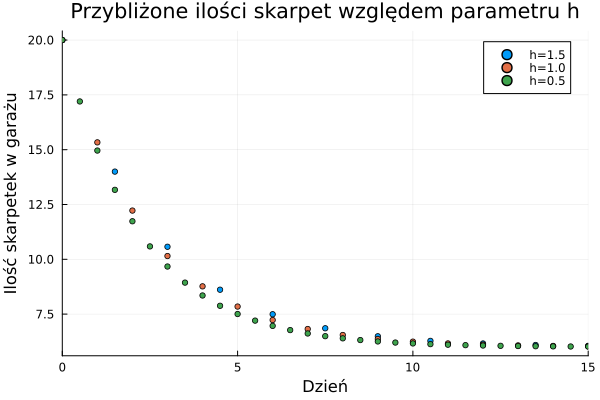

In [8]:
x_values_h1, y_values_h1 = solve_by_backward_euler(f, I₀, day_start, day_end, 1.5, get_constants_to_backward_euler(1.5, T, I₀, D₀)...)
x_values_h2, y_values_h2 = solve_by_backward_euler(f, I₀, day_start, day_end, 1.0, get_constants_to_backward_euler(1.0, T, I₀, D₀)...)
x_values_h3, y_values_h3 = solve_by_backward_euler(f, I₀, day_start, day_end, 0.5, get_constants_to_backward_euler(0.5, T, I₀, D₀)...)

scatter(x_values_h1, y_values_h1, label="h=1.5", markersize=3, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Przybliżone ilości skarpet względem parametru h", grid=true, xlims=(day_start, day_end))
scatter!(x_values_h2, y_values_h2, label="h=1.0", markersize=3)
scatter!(x_values_h3, y_values_h3, label="h=0.5", markersize=3)

Dostaliśmy krzywą podobne kształtu, natomiast zanim przejdziemy do sumarycznego porównania wszystkich metod, spójrzmy na małą próbkę - porównajmy wyniki dla $h = 1.5$

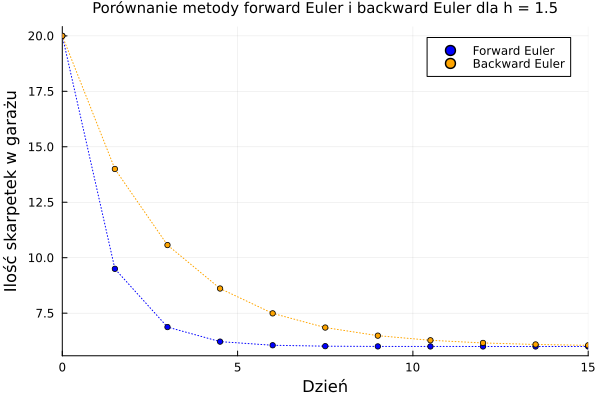

In [9]:
h = 1.5 # Compare with the same 'h' value

x_values_forward, y_values_forward = solve_by_forward_euler(f, I₀, day_start, day_end, h)
x_values_backward, y_values_backward = solve_by_backward_euler(f, I₀, day_start, day_end, h, get_constants_to_backward_euler(h, T, I₀, D₀)...)

plot(x_values_forward, y_values_forward, label="", color="blue", linestyle=:dot, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Porównanie metody forward Euler i backward Euler dla h = 1.5", grid=true, xlims=(day_start, day_end), titlefontsize=10)
plot!(x_values_backward, y_values_backward, label="", color="orange", linestyle=:dot)

scatter!(x_values_forward, y_values_forward, label="Forward Euler", markersize=3, color="blue")
scatter!(x_values_backward, y_values_backward, label="Backward Euler", markersize=3, color="orange")


Mamy to! Możemy zauważyć, że prawdopodobnie w przypadku dużych zmian funkcji, metoda jawna będzie niedoszacowywać, a metoda niejawna będzie nadszacowywać - natomiast, na ten moment są to jedynie nasze domysły.

Z względu na spore rozbieżności zdecydowaliśmy się zaimplementować jeszcze jeden algorytm zanim rozwiążemy równanie analitycznie i porównamy nasze schematy.

### Algorytm Rungego-Kutty IV rzędu

Wyniki, które uzyskaliśmy przy pomocy algorytmów Eulera stanowczo się różnią, więc zanim zweryfikujemy który z nich jest dokładniejszy, spróbujmy jeszcze jednego podejście.

Algorythm Runego-Kutty to metoda, która zamiast wyliczać następny punkt $x_{n+1}$ z wykorzystaniem jednej pochodnej - rozbija tę drogę na parę mniejszych elementów.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Runge-Kutta_slopes.svg/800px-Runge-Kutta_slopes.svg.png">
<p>Źródło [7]</p>
</center>

Tak jak widać na ząłączonym obrazku, naszym celem będzie podzielenie wyliczania nowego elementu na 4 kroki. Każdy z tych kroków następnie wykorzystamy, aby zbudować przybliżenie nowego punktu. Powyższy schemat może wydawać się zagadkowy, zatem spójrzmy jak wygląda definicja tego algorytmu:

$$
\frac{dy}{dx} = f(x, y), \ y(x_0) = y_0
$$

$$
n_1 = h \cdot f(x_k, y_k)
$$

$$
n_2 = h \cdot f(x_k + \frac{h}{2}, y_k + \frac{n_1}{2})
$$

$$
n_3 = h \cdot f(x_k + \frac{h}{2}, y_k + \frac{n_2}{2})
$$

$$
n_4 = h \cdot f(x_k + h, y_k + n_3)
$$

$$
y_{k+1} = y_k + \frac{1}{6}(n_1 + 2n_2 + 2n_3 + n_4)
\tag{24}
$$

Składnik $n_1$ powinnien być już dla nas jasny - jest to czynnik wyznaczony metodą jawną Eulera. Następnie wyliczamy kolejny element w środku drogi do nowego punktu wykorzystując wartość uzyskaną z $n_1$.
Tak, jak zaprezentowano na powyższym obrazie pomocnicznym element $n_3$ zostanie również wyznaczony w połowie odległości - tylko wykorzystana zostanie wartość $n_2$. Ostatni składnik $n_4$ naszej drogi wyliczany jest już na samym końcu z wykorzystaniem punktu $n_3$.

Podzieliśmy zatem naszą drogę na mniejsze składowe, <i>ale</i> nie są one dla tak samo ważne. Algorytm ten koryguje istotę każdego elementu poprzez nadanie wagi. Elementy $n_1$ i $n_4$ staną sie dla nas 2 razy mniej ważne niż elementy $n_2$ i $n_3$.

Dla zobrazowania przedstawimy obrazek autorstwa Matthew #314 Engineering $^{[8]}$, w którym zastępczo wykorzystano oznaczenie $k_i$ dla naszych elementów $n_i$ oraz $\Delta t$ dla czynnika $h$.

<center>
<img src="assets/yt1.jpg">
<p>Źródło [8]</p>
</center>

Mamy nadzieję, że udało nam się przedstawić esencję tej metody, skupmy się teraz zatem na jej implementacji


In [10]:
"""
    solve_by_rk4(f::Function, y₀::Number, x₀::Int, xₙ::Int, h::Float64)::Tuple{Vector{Float64}, Vector{Float64}}

Solves an ordinary differential equation using the fourth-order Runge-Kutta (RK4) method.

Parameters:
- `f`: Function representing the derivative function: y'(x) = f(x, y)
- `y₀`: Initial condition
- `x₀`: Lower bound for x, where x ∈ [x₀, xₙ]
- `xₙ`: Upper bound for x, where x ∈ [x₀, xₙ] 
- `h`: Step size

Returns:
- `x_values`: Array with x values corresponding to each step.
- `y_values`: Array with approximated values of the given function.
"""
function solve_by_rk4(
    f::Function,
    y₀::Number,
    x₀::Int,
    xₙ::Int,
    h::Float64,
)::Tuple{Vector{Float64}, Vector{Float64}}
    n = round(Int, (xₙ - x₀) / h)

    y_values = zeros(n + 1)
    x_values = zeros(n + 1)

    x_values[1] = x₀
    y_values[1] = y₀

    for index in 1:n
        n₁ = h * f(x_values[index], y_values[index])
        n₂ = h * f(x_values[index] + (h / 2), y_values[index] + (n₁ / 2))
        n₃ = h * f(x_values[index] + (h / 2), y_values[index] + (n₂ / 2))
        n₄ = h * f(x_values[index] + h, y_values[index] + n₃)

        x_values[index + 1] = x_values[index] + h
        y_values[index + 1] = y_values[index] + ((1 / 6) * (n₁ + (2 * n₂) + (2 * n₃) + n₄))
    end

    return x_values, y_values
end

solve_by_rk4

Zgodnie z podanym wzorem (24) wyliczamy każdą składową $n_i$, kolejno sumuje z uwzględnieniem wagi elementu. Sprawdźmy zatem ten schemat w działaniu na przykładzie z naszą skarpeciarnią

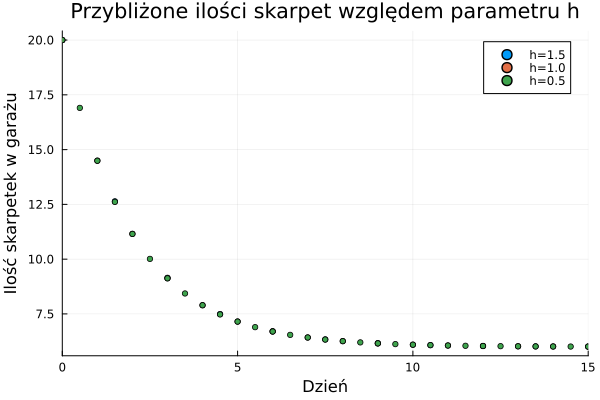

In [11]:
x_values_h1, y_values_h1 = solve_by_rk4(f, I₀, day_start, day_end, 1.5)
x_values_h2, y_values_h2 = solve_by_rk4(f, I₀, day_start, day_end, 1.0)
x_values_h3, y_values_h3 = solve_by_rk4(f, I₀, day_start, day_end, 0.5)

scatter(x_values_h1, y_values_h1, label="h=1.5", markersize=3, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Przybliżone ilości skarpet względem parametru h", grid=true, xlims=(day_start, day_end))
scatter!(x_values_h2, y_values_h2, label="h=1.0", markersize=3)
scatter!(x_values_h3, y_values_h3, label="h=0.5", markersize=3)

Mamy to! A może jednak nie.. - ewidetnie coś tutaj nie wyświetla się tak, jak powinno, chociaż nasza implementacja jest poprawna. Zgodnie z naszą intuicją podział drogi na mniejsze składowe ewidentnie skorygował nasz algorytm i prawdopodobnie punkty nałożyły się na siebie. Spójrzmy

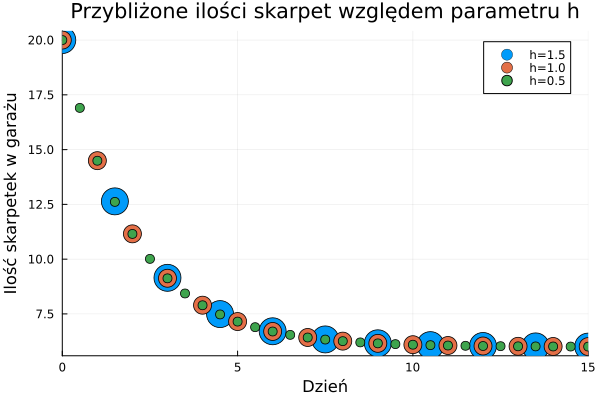

In [12]:
scatter(x_values_h1, y_values_h1, label="h=1.5", markersize=15, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Przybliżone ilości skarpet względem parametru h", grid=true, xlims=(day_start, day_end))
scatter!(x_values_h2, y_values_h2, label="h=1.0", markersize=10)
scatter!(x_values_h3, y_values_h3, label="h=0.5", markersize=5)

Dokonaliśmy powiększenia znaczników, tak aby się nie nakładały na siebie. Tym samym rozwiązaliśmy zagadkę, algorytm ewidetnie działa bardzo podobnie dla różnic $h$ wynoszących $0.5$. Dokonajmy kolejnego eksperymentu

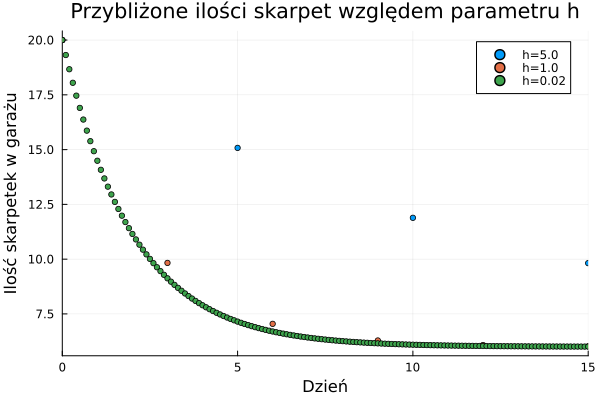

In [13]:
x_values_h1, y_values_h1 = solve_by_rk4(f, I₀, day_start, day_end, 5.0)
x_values_h2, y_values_h2 = solve_by_rk4(f, I₀, day_start, day_end, 3.0)
x_values_h3, y_values_h3 = solve_by_rk4(f, I₀, day_start, day_end, 0.1)

scatter(x_values_h1, y_values_h1, label="h=5.0", markersize=3, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Przybliżone ilości skarpet względem parametru h", grid=true, xlims=(day_start, day_end))
scatter!(x_values_h2, y_values_h2, label="h=1.0", markersize=3)
scatter!(x_values_h3, y_values_h3, label="h=0.02", markersize=3)

Metoda działa sprawnie, dla zmniejszającego się składnika $h$, punkty wydają się układać <i>lepiej</i>. Ale czy poprawniej? Zanim przystąpimy do rozwiązania analitycznego i porównania wyników, sprawdźmy jak wygląda aktualne zestawienie zastosowania metod numerycznych

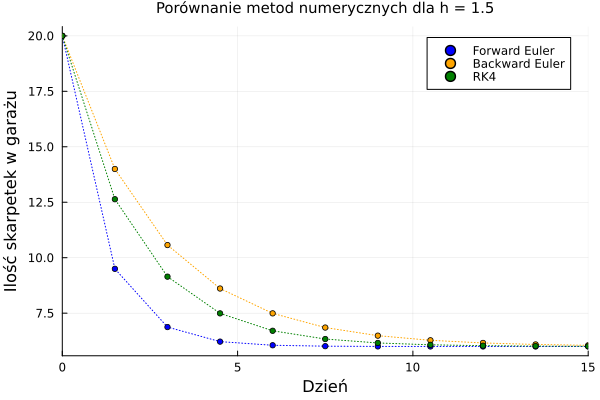

In [14]:
h = 1.5 # Compare with the same 'h' value

x_values_forward, y_values_forward = solve_by_forward_euler(f, I₀, day_start, day_end, h)
x_values_backward, y_values_backward = solve_by_backward_euler(f, I₀, day_start, day_end, h, get_constants_to_backward_euler(h, T, I₀, D₀)...)
x_values_rk4, y_values_rk4 = solve_by_rk4(f, I₀, day_start, day_end, h)

plot(x_values_forward, y_values_forward, label="", color="blue", linestyle=:dot, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Porównanie metod numerycznych dla h = 1.5", grid=true, xlims=(day_start, day_end), titlefontsize=10)
plot!(x_values_backward, y_values_backward, label="", color="orange", linestyle=:dot)
plot!(x_values_rk4, y_values_rk4, label="", color="green", linestyle=:dot)

scatter!(x_values_forward, y_values_forward, label="Forward Euler", markersize=3, color="blue")
scatter!(x_values_backward, y_values_backward, label="Backward Euler", markersize=3, color="orange")
scatter!(x_values_rk4, y_values_rk4, label="RK4", markersize=3, color="green")

Każda z naszych metod prezentuje przybliżenia różniące się w dość znaczący sposób. Rozwikłajmy zatem zagadkę, która robi to najlepiej

## Podejście analityczne

Przypomnijmy, jak opisany jest nasz pierwotny problem (8):

$$
\frac{dI}{dt} = \frac{I_t - I(t)}{T} - D_0 \text{, gdzie } I_t, T, D_0 \in \mathbb{N}
$$

Stosujemy metodę rozdzielenia zmiennych, czyli naszym celem będzie doprowadzenie równania do postaci

$$
\frac{1}{f(y(t))}\ y'(t) = g(t).
$$

Oznaczmy zatem $\frac{dI}{dt} = I'$ oraz $I(t) = I$. Kolejno podzielmy całość przez wyrażenie z prawej strony

$$
\frac{1}{\frac{1}{T}(I_t - I) - D_0}\ I' = 1.
$$

Teraz nałóżmy obustronnie operator całki $\int dt$

$$
\int \frac{1}{\frac{1}{T}(I_t - I) - D_0}\ I' dt = \int dt.
$$

Doprowadziliśmy zatem równanie do postaci:

$$
\int \frac{1}{f(I)}\ I'\ dt = \int g(t)\ dt,
$$

gdzie 

$$
f(I) = \frac{1}{T}(I_t - I) - D_0.
$$

Podstawmy $z = I = I(t)$ z czego wynika $dz = I'\ dt = I'(t)\ dt$

$$
\int \frac{dz}{f(z)}\ = \int g(t)\ dt.
$$

Rozwiążmy teraz obie całki

$$
\int g(t)\ dt = \int 1\ dt = t + C_1 \text{, gdzie } C_1 \in \mathbb{R}
\tag{25}
$$

oraz

$$
\begin{align*}
\tag{26}
\int \frac{dz}{f(z)}\
&= \int \frac{dz}{\frac{1}{T}(I_t - z) - D_0} \\
&= \int \frac{dz}{\frac{1}{T}((I_t - z) - TD_0)} \\
&= -T \int \frac{-1}{(I_t - z) - TD_0} dz \\
&= -T \ln{\mid I_t - z - TD_0 \mid} + C_2  \\
&= -T \ln{\mid I_t - I(t) - TD_0 \mid} + C_2 \text{, gdzie } C_2 \in \mathbb{R}.
\end{align*}
$$

Powrócmy zatem do równania wraz z wynikami (25) i (26)

$$
-T \ln{\mid I_t - I(t) - TD_0 \mid} + C_2 = t + C_1 ,
$$

obie stałe $C_1$ i $C_2$ przeniesione na jedną stronę dadzą nową stałą, więc zapiszmy $C_1 - C_2 = C$

$$
-T \ln{\mid I_t - I(t) - TD_0 \mid} = t + C,
$$

mnożymy obustronnie przez ${\rm e}$

$$
{\mid I_t - I(t) - TD_0 \mid}^{-T} = {\rm e}^{t} \cdot {\rm e}^{C}.
$$

Ustalmy nową stałą $D = {\rm e}^{C}$

$$
{\mid I_t - I(t) - TD_0 \mid}^{-T} = D{\rm e}^{t}
$$

$$
{\mid I_t - I(t) - TD_0 \mid} = D{\rm e}^{\frac{-t}{T}}
\tag{27}
$$

W tym momencie rozważmy dwa przypadki:
1. $I_t - I(t) - TD_0 \ge 0$
2. $I_t - I(t) - TD_0 \lt 0$.

Mając warunek początkowy (7), $I(0) = I_0$ wyliczmy stałe $D$ dla obu przypadków.

Przypadek 1:

$$
I_t - I(t) - TD_0 = D{\rm e}^{\frac{-t}{T}}
\tag{28}
$$

$$
I(t) = -D{\rm e}^{\frac{-t}{T}} + I_t - TD_0.
$$

Używając warunku początkowego

$$
I(0) = -D + I_t - TD_0 = I_0,
$$

znajdujemy wartość stałej $D$

$$
D = I_t - TD_0 - I_0.
\tag{29}
$$

Wracając do równania nr (28)

$$
I(t) = -(I_t - TD_0 - I_0){\rm e}^{\frac{-t}{T}} + I_t - TD_0,
$$

uprośćmy

$$
I(t) = (-I_t + TD_0 + I_0){\rm e}^{\frac{-t}{T}} + I_t - TD_0.
\tag{30}
$$

Przypadek 2:

$$
I_t - I(t) - TD_0 = -D{\rm e}^{\frac{-t}{T}}
\tag{31}
$$

$$
I(t) = D{\rm e}^{\frac{-t}{T}} + I_t - TD_0.
$$

Używając warunku początkowego

$$
I(0) = D + I_t - TD_0 = I_0,
$$

$$
D = -I_t + TD_0 + I_0,
$$

Wracając do równania nr (31)

$$
I(t) = (-I_t + TD_0 + I_0){\rm e}^{\frac{-t}{T}} + I_t - TD_0.
\tag{32}
$$

Zauważmy w tym momencie, że równania które otrzymaliśmy (30) i (32) to

$$
\begin{cases}
I(t) = (-I_t + TD_0 + I_0){\rm e}^{\frac{-t}{T}} + I_t - TD_0 \text{, gdzie } I_t - I(t) - TD_0 \ge 0  \\
I(t) = (-I_t + TD_0 + I_0){\rm e}^{\frac{-t}{T}} + I_t - TD_0 \text{, gdzie } I_t - I(t) - TD_0 \lt 0.
\end{cases}
$$

Okazuje się, że oba przypadki dają nam to samo równanie, zatem wynikiem analitycznym jest 

$$
I(t) = (-I_t + TD_0 + I_0){\rm e}^{\frac{-t}{T}} + I_t - TD_0.
\tag{33}
$$

Zajmijmy się zatem implementacją podanego rozwiązania w kodzie.

In [15]:
"""
    solve_by_analytical_solution(Iₜ::Int, T::Int, D₀::Int, y₀::Number, x₀::Int, xₙ::Int, h::Float64)::Tuple{Vector{Float64}, Vector{Float64}}

Calculate the solution of an ordinary differential equation using an analytical method.

Parameters:
- `Iₜ`: Target value.
- `T`: Order policy controller value.
- `D₀`: Delivery constant.
- `y₀`: Initial condition.
- `x₀`: Lower bound for x, where x ∈ [x₀, xₙ]
- `xₙ`: Upper bound for x, where x ∈ [x₀, xₙ] 
- `h`: Step size

Returns:
- `x_values`: Array with x values corresponding to each step.
- `y_values`: Array with approximated values of the given function.
"""
function solve_by_analytical_solution(
    Iₜ::Int,
    T::Int,
    D₀::Int,
    y₀::Number,
    x₀::Int,
    xₙ::Int,
    h::Float64,
)::Tuple{Vector{Float64}, Vector{Float64}}
    n = round(Int, (xₙ - x₀) / h)

    y_values = zeros(n + 1)
    x_values = zeros(n + 1)

    x_values[1] = x₀
    y_values[1] = y₀

    for index in 1:n
        x_values[index + 1] = x_values[index] + h
        y_values[index + 1] = (-Iₜ + (T * D₀) + y₀) * exp(-x_values[index + 1] / T) + Iₜ - (T * D₀)
    end

    return x_values, y_values
end

solve_by_analytical_solution

Nasza implementacja metody już nie przyjmuje jako parametru funkcji $F$ natomiast czynniki, które są składową analitycznego rozwiązania. Dzięki temu obliczamy już dokładne wartości dla podanych kroków. Sprawdźmy wynik na naszym przykładzie. 

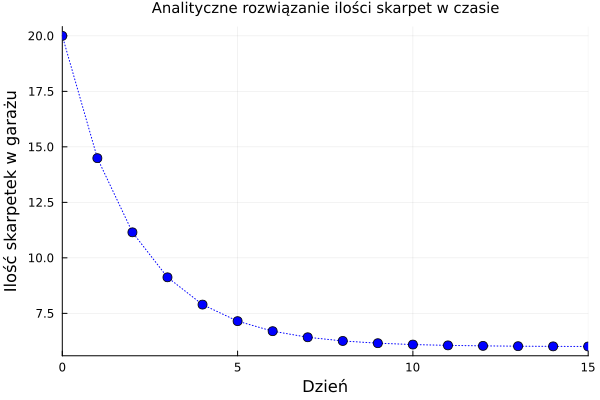

In [16]:
x_values, y_values = solve_by_analytical_solution(Iₜ, T, D₀, I₀, day_start, day_end, 1.0)

plot(x_values, y_values, label="", color="blue", linestyle=:dot, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Analityczne rozwiązanie ilości skarpet w czasie", grid=true, xlims=(day_start, day_end), titlefontsize=10)
scatter!(x_values, y_values, markersize=5, color="blue", label="")

Udało się! Uzyskaliśmy obliczenia ostatnią, analityczną metodą

### Porównanie

W tym momencie wiadome jest już wszystko, poza zwycięzcą. Porównajmy zatem wszystkie dotychczasowe metody numeryczne na jednym wykresie. Za parametr $h$ przyjmiemy $1.0$, aby spróbować szacować kolejne kroki o różnice w pełnych dniach.

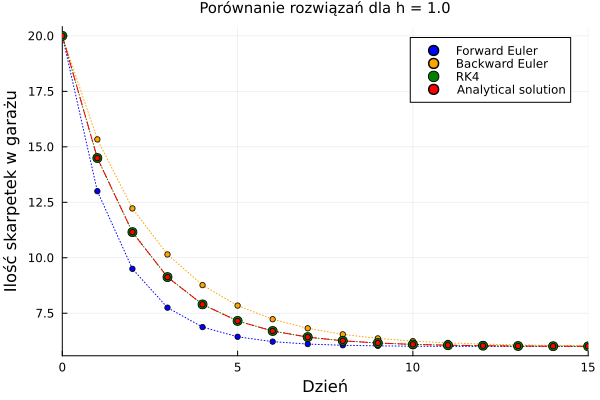

In [17]:
h = 1.0 # Compare with the same 'h' value

x_values_forward, y_values_forward = solve_by_forward_euler(f, I₀, day_start, day_end, h)
x_values_backward, y_values_backward = solve_by_backward_euler(f, I₀, day_start, day_end, h, get_constants_to_backward_euler(h, T, I₀, D₀)...)
x_values_rk4, y_values_rk4 = solve_by_rk4(f, I₀, day_start, day_end, h)
x_values_analytic, y_values_analytic = solve_by_analytical_solution(Iₜ, T, D₀, I₀, day_start, day_end, h)

plot(x_values_forward, y_values_forward, label="", color="blue", linestyle=:dot, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Porównanie rozwiązań dla h = 1.0", grid=true, xlims=(day_start, day_end), titlefontsize=10)
plot!(x_values_backward, y_values_backward, label="", color="orange", linestyle=:dot)
plot!(x_values_rk4, y_values_rk4, label="", color="green", linestyle=:dot)
plot!(x_values_analytic, y_values_analytic, label="", color="red", linestyle=:dash)

scatter!(x_values_forward, y_values_forward, label="Forward Euler", markersize=3, color="blue")
scatter!(x_values_backward, y_values_backward, label="Backward Euler", markersize=3, color="orange")
scatter!(x_values_rk4, y_values_rk4, label="RK4", markersize=5, color="green")
scatter!(x_values_analytic, y_values_analytic, label="Analytical solution", markersize=3, color="red")

Kurz opadł. Tak jak oczekiwaliśmy, teoria potwierdziła się z praktyką i algorytm Rutty Kuttego IV rzędu przybliża wartości dla naszych oczekiwań niemal idealnie, nawet dla tak dużego parametru $h = 1$.

Skupmy się jeszcze na moment na analizie tego co udało nam się policzyć.


### Charakterystyka rozwiązania

#### Ile towaru zamówić?

Posiadamy już rozwiązanie naszego równania, ale co nam to mówi? Cała składowa i proces wielkości stanu magazynu zakłada również zamawianie produktu. Przypomnijmy zatem naszą zastosowaną politykę uzupełnień (9)

$$
O(t)=\frac{I_t - I(t)}{T}.
$$

Na tym etapie wszystkie czynniki są już dla nas znane, więc możemy wyliczyć ważniejszą dla nas jako kierowników magazynu funkcję "ile towaru domawiać"

$$
\begin{align*}
O(t) &= \frac{I_t - ((-I_t + TD_0 + I_0){\rm e}^{\frac{-t}{T}} + I_t - TD_0)}{T} \\
&= \frac{I_t -(-I_t + TD_0 + I_0){\rm e}^{\frac{-t}{T}} - I_t + TD_0}{T} \\
&= D_0 - \frac{(-I_t + TD_0 + I_0){\rm e}^{\frac{-t}{T}}}{T} \\
&= D_0 - (\frac{I_0 - I_t}{T} + D_0){\rm e}^{\frac{-t}{T}} \\
\end{align*}
\tag{34}
$$

Sukces! Tak naprawdę rozwiązaliśmy nasz problem, uzyskaliśmy informację o tym, ile w danej chwili czasu powinniśmy domówić towaru. Całość tego problemu możemy również rozwiązywać numerycznie lub wykorzystać obliczone wartości numeryczne $I$, aby poznawać kolejne wartości $O$. Zdecydowaliśmy się jednak kontynuować pracę i badanie funkcji $I$ z tego powodu, że opowie nam ona więcej o <i>kondycji</i> naszego magazynu. Przy czym na ten moment widzimy, że uzyskanie dokładnych wartości $O$ jest również możliwe analitycznie.

Zobaczmy jak wygląda funkcja zamówień dla naszego przykładu. Rozpocznij od implementacji analitycznej. 


In [18]:
"""
    solve_orders_by_analytical_solution(Iₜ::Int, T::Int, D₀::Int, y₀::Number, x₀::Int, xₙ::Int, h::Float64)::Tuple{Vector{Float64}, Vector{Float64}}

Calculate the orders using an analytical solution based on a given inventory model.

Parameters:
- `Iₜ`: Target value.
- `T`: Order policy controller value.
- `D₀`: Delivery constant.
- `y₀`: Initial condition.
- `x₀`: Lower bound for x, where x ∈ [x₀, xₙ]
- `xₙ`: Upper bound for x, where x ∈ [x₀, xₙ] 
- `h`: Step size

Returns:
- `x_values`: Array with x values corresponding to each step.
- `y_values`: Array with approximated order values.
"""
function solve_orders_by_analytical_solution(
    Iₜ::Int,
    T::Int,
    D₀::Int,
    y₀::Number,
    x₀::Int,
    xₙ::Int,
    h::Float64,
)::Tuple{Vector{Float64}, Vector{Float64}}
    n = round(Int, (xₙ - x₀) / h)

    y_values = zeros(n + 1)
    x_values = zeros(n + 1)

    x_values[1] = x₀
    y_values[1] = D₀ - ((I₀ - Iₜ) / T + D₀) * exp(-x₀ / T) 

    for index in 1:n
        x_values[index + 1] = x_values[index] + h
        y_values[index + 1] = D₀ - ((I₀ - Iₜ) / T + D₀) * exp(-x_values[index + 1] / T)
    end

    return x_values, y_values
end

solve_orders_by_analytical_solution

Dla metod numerycznych stwórzmy funkcję, która na podstawie otrzymanych wartości, używając wzoru na $O$ (9) przekształci otrzymane wartości z wcześniejszych implementacji 

In [19]:
"""
    solve_orders_by_numeric_solution(
        x_inventory_values::Vector{Float64},
        y_inventory_values::Vector{Float64},
        Iₜ::Int,
        T::Int,
    )::Tuple{Vector{Float64}, Vector{Float64}}

Approximates the orders using a numeric solution based on given inventory values.

Parameters:
- `x_inventory_values`: Array of x values corresponding to inventory steps.
- `y_inventory_values`: Array of y values corresponding to inventory approximations.
- `Iₜ`: Target value.
- `T`: Order policy controller value.

Returns:
- `x_orders_values`: Array with x values corresponding to each inventory step.
- `y_orders_values`: Array with approximated order values.
"""
function solve_orders_by_numeric_solution(
    x_inventory_values::Vector{Float64},
    y_inventory_values::Vector{Float64},
    Iₜ::Int,
    T::Int,
)::Tuple{Vector{Float64}, Vector{Float64}}
    n = length(x_inventory_values)

    x_orders_values = zeros(n)
    y_orders_values = zeros(n)

    for index in 1:n
        x_orders_values[index] = x_inventory_values[index]
        y_orders_values[index] = (Iₜ - y_inventory_values[index]) / T
    end

    return x_orders_values, y_orders_values
end


solve_orders_by_numeric_solution

W powyższym przykładzie tworzymy 2 nowe wektory, aby nie zmieniać wartości z przekazanych w parametrach funkcji danych. Kolejno dla każdego elementu używajać wzoru na $O$ wyliczamy nową wartość.

Sprawdźmy powyższe implementacje w akcji

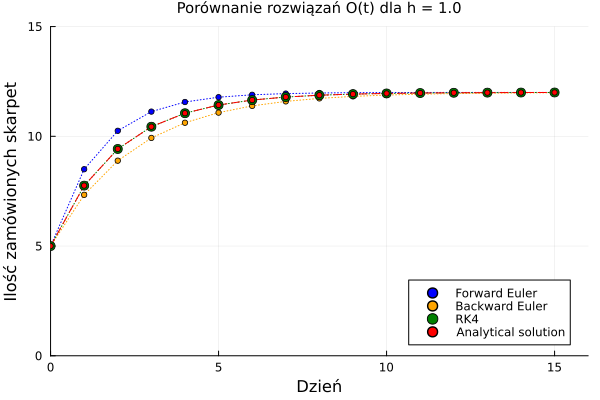

In [20]:
h = 1.0 # Compare with the same 'h' value

x_inventory_values_forward, y_inventory_values_forward = solve_by_forward_euler(f, I₀, day_start, day_end, h)
x_inventory_values_backward, y_inventory_values_backward = solve_by_backward_euler(f, I₀, day_start, day_end, h, get_constants_to_backward_euler(h, T, I₀, D₀)...)
x_inventory_values_rk4, y_inventory_values_rk4 = solve_by_rk4(f, I₀, day_start, day_end, h)

# Change I(t) values to O(t) values
x_orders_values_forward, y_orders_values_forward = solve_orders_by_numeric_solution(x_inventory_values_forward, y_inventory_values_forward, Iₜ, T)
x_orders_values_backward, y_orders_values_backward = solve_orders_by_numeric_solution(x_inventory_values_backward, y_inventory_values_backward, Iₜ, T)  
x_orders_values_rk4, y_orders_values_rk4 = solve_orders_by_numeric_solution(x_inventory_values_rk4, y_inventory_values_rk4, Iₜ, T) 
x_orders_values_analytic, y_orders_values_analytic = solve_orders_by_analytical_solution(Iₜ, T, D₀, I₀, day_start, day_end, h)

plot(x_orders_values_forward, y_orders_values_forward, label="", color="blue", linestyle=:dot, xlabel="Dzień", ylabel="Ilość zamówionych skarpet", title="Porównanie rozwiązań O(t) dla h = 1.0", grid=true, xlims=(day_start, day_end + 1), ylims=(0, 15), titlefontsize=10, legend=:bottomright)
plot!(x_orders_values_backward, y_orders_values_backward, label="", color="orange", linestyle=:dot)
plot!(x_orders_values_rk4, y_orders_values_rk4, label="", color="green", linestyle=:dot)
plot!(x_orders_values_analytic, y_orders_values_analytic, label="", color="red", linestyle=:dash)

scatter!(x_orders_values_forward, y_orders_values_forward, label="Forward Euler", markersize=3, color="blue")
scatter!(x_orders_values_backward, y_orders_values_backward, label="Backward Euler", markersize=3, color="orange")
scatter!(x_orders_values_rk4, y_orders_values_rk4, label="RK4", markersize=5, color="green")
scatter!(x_orders_values_analytic, y_orders_values_analytic, label="Analytical solution", markersize=3, color="red")

Nasze wyniki czy to stanu magazynowego czy ilości zamawianego towaru po pewnym czasie stają się niemal stałe. Przeanalizujmy dlaczego

#### Kondycja magazynu

Kolejnym bardzo ciekawym zagadnieniem jest wpływ dobrego kontrolera $T$ na kondycję naszego magazynu. Na ten moment liczba ta i dobierany przez nas współczynnik może się wydawać się trochę enigmatyczny. Proponujemy spojrzeć jak zachowa się stan naszego magazynu, jeśli <i>wyślemy</i> $t$ do $\infty$

$$
\begin{align*}
\lim_{t \to \infty} I(t) &= \lim_{t \to \infty} (-I_t + TD_0 + I_0){\rm e}^{\frac{-t}{T}} + I_t - TD_0 \\
&= (-I_t + TD_0 + I_0){\rm e}^{-\infty} + I_t - TD_0 \\
&= I_t - TD_0 .
\tag{35}
\end{align*}
$$

Okazuje się, że przy dobranej polityce uzupełnień magazynu i stałej ilości zamówień nasz stan będzie dążył do bycia <i>stabilnym</i>. To znaczy nasze oczekiwane zapełnienie $I_t$ będzie pomniejszone o ilość zamówień $D_0$ pomnożoną przez kontroler $T$. Objawia się tutaj znaczenie doboru naszej polityki $T$, tak jak wspominaliśmy dobranie wartości za małej, będzie powodowało przestoje na magazynie i olbrzymie dostawy - po drugiej stronie natomiast zwiększanie wartości $T$ prowadzi do zmniejszenia naszego ustatkowane stanu na magazynie. Całość oczywiście powinna być dobrze dobrana i przeanalizowana względem naszych parametrów i oczekiwań.

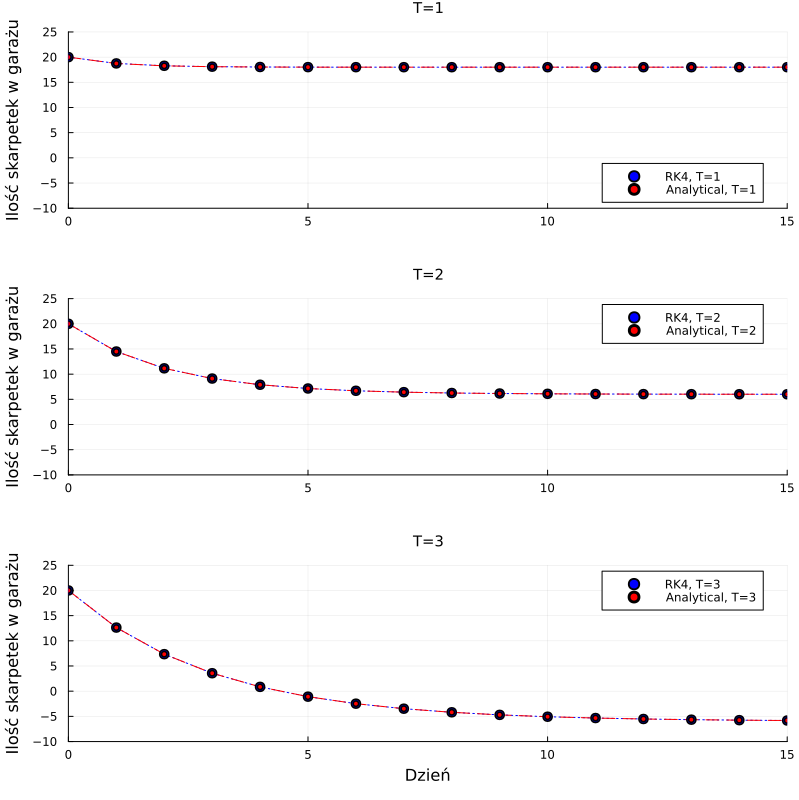

In [21]:
h = 1.0 # Compare with the same 'h' value

T = 1
f = get_f(Iₜ, T, D₀)
x_values_rk4_T1, y_values_rk4_T1 = solve_by_rk4(f, I₀, day_start, day_end, h)
x_values_analytic_T1, y_values_analytic_T1 = solve_by_analytical_solution(Iₜ, T, D₀, I₀, day_start, day_end, h)

T = 2
f = get_f(Iₜ, T, D₀)
x_values_rk4_T2, y_values_rk4_T2 = solve_by_rk4(f, I₀, day_start, day_end, h)
x_values_analytic_T2, y_values_analytic_T2 = solve_by_analytical_solution(Iₜ, T, D₀, I₀, day_start, day_end, h)

T = 3
f = get_f(Iₜ, T, D₀)
x_values_rk4_T3, y_values_rk4_T3 = solve_by_rk4(f, I₀, day_start, day_end, h)
x_values_analytic_T3, y_values_analytic_T3 = solve_by_analytical_solution(Iₜ, T, D₀, I₀, day_start, day_end, h)

plot_T1 = plot(x_values_rk4_T1, y_values_rk4_T1, label="", color="blue", linestyle=:dot, xlabel=" ", ylabel="Ilość skarpetek w garażu", grid=true, xlims=(day_start, day_end), ylims=(-10, 25), titlefontsize=10)
plot!(x_values_analytic_T1, y_values_analytic_T1, label="", color="red", linestyle=:dash)
scatter!(x_values_rk4_T1, y_values_rk4_T1, label="RK4, T=1", markersize=5, color="blue")
scatter!(x_values_analytic_T1, y_values_analytic_T1, label="Analytical, T=1", markersize=3, color="red")

plot_T2 = plot(x_values_rk4_T2, y_values_rk4_T2, label="", color="blue", linestyle=:dot, xlabel=" ", ylabel="Ilość skarpetek w garażu", grid=true, xlims=(day_start, day_end), ylims=(-10, 25), titlefontsize=10)
plot!(x_values_analytic_T2, y_values_analytic_T2, label="", color="red", linestyle=:dash)
scatter!(x_values_rk4_T2, y_values_rk4_T2, label="RK4, T=2", markersize=5, color="blue")
scatter!(x_values_analytic_T2, y_values_analytic_T2, label="Analytical, T=2", markersize=3, color="red")

plot_T3 = plot(x_values_rk4_T3, y_values_rk4_T3, label="", color="blue", linestyle=:dot, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", grid=true, xlims=(day_start, day_end), ylims=(-10, 25), titlefontsize=10)
plot!(x_values_analytic_T3, y_values_analytic_T3, label="", color="red", linestyle=:dash)
scatter!(x_values_rk4_T3, y_values_rk4_T3, label="RK4, T=3", markersize=5, color="blue")
scatter!(x_values_analytic_T3, y_values_analytic_T3, label="Analytical, T=3", markersize=3, color="red")

plot(plot_T1, plot_T2, plot_T3, layout=(3, 1), size=(800, 800), title=["T=1" "T=2" "T=3"])


Zwróćmy uwagę, że na wykresie nr 3. czynnik $T = 3$ powoduje, że stan magazynowy produktu spadnie poniżej zera, czyli nie będziemy mieć nic na półkach. Sytuacja fatalna.

### Zamawianie towaru

Dokonajmy podobnego zabiegu na naszej funkcji obrazującej wymaganą ilość produkt do domówienia

$$
\begin{align*}
\lim_{t \to \infty} O(t) &= \lim_{t \to \infty} D_0 - (\frac{I_0 - I_t}{T} + D_0){\rm e}^{\frac{-t}{T}} \\
&= D_0 - (\frac{I_0 - I_t}{T} + D_0){\rm e}^{-\infty} \\
&= D_0.
\tag{36}
\end{align*}
$$

Przy uwględnionych stałych czynników, nasz magazyn będzie stabilny również pod względem dostaw. Ma to również czysto praktyczny sens, tzn. jeśli uda nam się doprowadzić magazyn do oczekiwanego stałego stanu to później musimy jedynie uzupełniać brakujące luki o stałą ilość zamówień.

### Rozwój
Załóżmy, że nasz interes ze skarpetami był <b>udany</b>. Udało nam się mocno rozwinąć naszą firmę. Przebranżowiliśmy się na buty, bo przecież ludzie nie mogą chodzić w samych skarpetkach oraz kupiliśmy magazyn, gdyż zwiększyły nam się obroty i teraz już operujemy na większych liczbach produktów. Dodatkowo magazyn jest o rzut beretem od fabryki butów, więc na każde zawołanie mamy dostawę jeśli ją potrzebujemy, zatem wciąż $\tau=0$.

Mamy także możliwość natychmiastowej zmiany marki butów jaką sprzedajemy poprzez prostą zmianę naklejki. Tak, możemy zaobserwować, jak z każdą naklejką zmienia sie popyt na nasze buty i czy magazyn nie wypada z równowagi - to znaczy, będziemy zmieniać sprzewadany towar.

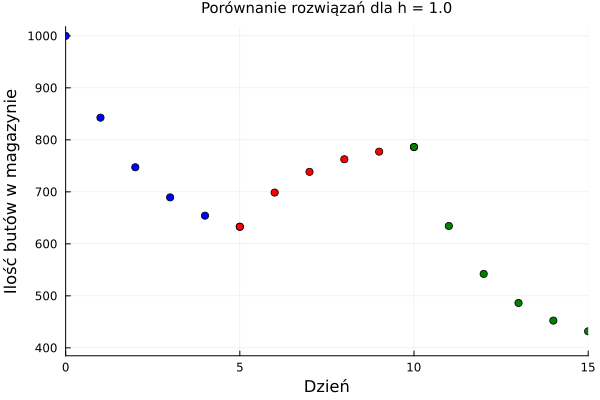

In [22]:
I₀ = 1000 # shoes on start 
D₀ = 200 # demand on our boots
Iₜ = 1000 # stock inventory limit
T = 2

day_start = 0
day_mid1 = 5
day_mid2 = 10
day_fin = 20

f = get_f(Iₜ, T, D₀)
x_inventory_values_rk4_1, y_inventory_values_rk4_1 = solve_by_rk4(f, I₀, day_start, day_mid1, h)

I₀ = last(y_inventory_values_rk4_1) # sneakers that we already have 
D₁ = 100 # new demand on our shoes

f = get_f(Iₜ, T, D₁)
x_inventory_values_rk4_2, y_inventory_values_rk4_2 = solve_by_rk4(f, I₀, day_mid1, day_mid2, h)

I₀ = last(y_inventory_values_rk4_2) # sneakers that we already have 
D₁ = 300 # new demand on our shoes

f = get_f(Iₜ, T, D₁)
x_inventory_values_rk4_3, y_inventory_values_rk4_3 = solve_by_rk4(f, I₀, day_mid2, day_fin, h)


scatter(x_inventory_values_rk4_1, y_inventory_values_rk4_1, label="", color="blue", linestyle=:dot, xlabel="Dzień", ylabel="Ilość butów w magazynie", title="Porównanie rozwiązań dla h = 1.0", grid=true, xlims=(day_start, day_end), titlefontsize=10)
scatter!(x_inventory_values_rk4_2, y_inventory_values_rk4_2, label="", color="red", linestyle=:dot)
scatter!(x_inventory_values_rk4_3, y_inventory_values_rk4_3, label="", color="green", linestyle=:dot)



# Niezerowy czas dostawy, $\tau \gt 0$

Sytuacja zmienia się kiedy istnieje niezerowy czas dostawy, ponieważ wtedy nasze równanie opisujące zmianę stanu magazynowego, staje się równaniem różniczkowym z opóźnieniem $\tau$. 

Określimy więc, jaka jest sytuacja dla danych interwałów i ram czasowych.

Dla $t \lt 0$ zapiszemy stan naszego magazynu jak następuje:
$$
R(t) = D(t) = 0 \\
I(t) = I_0
\tag{37}
$$

Przyjmujemy, że żadne zamówienia nie są składane jak i nie ma żadnych zapotrzebowań. W magazynie znajduje się też określona już przez nas ilość towaru.

W chwili $t=0$ zmienia się zapotrzebowanie i od tego momentu mamy $D(t) = D_0 $. Zaś do chwili $t=\tau$ żadne uzupełnienia nie są dostarczone do magazynu co wynika z (3). Nasze równanie (8) opisujące zmianę stanu magazynu w chwilach $0 \le t \lt \tau$ przyjmuje postać:
$$
\tag{38}
\frac{dI}{dt} = R(t) - D(t) = 0 - D_0 = -D_0
$$

Dla $\tau \le t$ sytuacja zmienia się znowu, gdyż wreszcie zmienia się także $R(t)$, i nasz wzór można zapisać jako:
$$
\begin{align*}
\frac{dI}{dt} &= R(t) - D(t) \\ 
              &= O(t-\tau) -D_0\\
\tag{39}
              &= \frac{I_t - I(t - \tau)}{T} - D_0,\text{ gdzie } t \in [\tau, \infin)
\end{align*}
$$
Przenosząc zmienne zależna na lewą stronę równania, a stałe na prawą otrzymamy:
$$
\tag{40}
\frac{dI}{dt} + \frac{I(t - \tau)}{T} = \frac{I_t}{T} - D_0
$$

## Rozwiązanie numeryczne

### Metoda Eulera jawna

Nasze prace nad poszukiwaniem modelu numerycznego rozpoczniemy jak w przypadku $\tau = 0$, czyli od metody jawnej Eulera. Znając opoźnienie nasze równanie przyjmie postać

$$
\frac{dy}{dx} = y(t - \tau).
$$

Zastosujmy teraz przybliżenie

$$
\frac{y_{n + 1} - y_n}{h} = y(t_n - \tau).
$$

Kolejno przekształćmy nasze równanie, aby poznać element $y_{n + 1}$

$$
y_{n + 1} = y_n + hy(t_n - \tau).
\tag{41}
$$

Metoda jest bardzo podobna do tej, która już aktualnie posiadamy. Zatem przeładujmy ją tak, aby jedna funkcja pozwalała nam również rozwiazywać równania opóźnione.

In [23]:
"""
    solve_by_forward_euler(
        f::Function,
        g::Function,
        τ::Int,
        y₀::Number,
        x₀::Int,
        xₙ::Int,
        h::Float64
    )::Tuple{Vector{Float64}, Vector{Float64}}

Solves an ordinary differential equation with a delayed term using the forward Euler method.

Parameters:
- `f`: Function representing the derivative function with a delay: y'(x - τ) = f(x - τ, y(x - τ))
- `g`: Function representing the initial condition with a delay: y(x - τ) = g(x - τ)
- `τ`: Delay value.
- `y₀`: Initial condition.
- `x₀`: Lower bound for x, where x ∈ [x₀, xₙ]
- `xₙ`: Upper bound for x, where x ∈ [x₀, xₙ] 
- `h`: Step size

Returns:
- `x_values`: Array with x values corresponding to each step.
- `y_values`: Array with approximated values of the given function.
"""
function solve_by_forward_euler(
    f::Function,
    g::Function,
    τ::Int,
    y₀::Number,
    x₀::Int,
    xₙ::Int,
    h::Float64
)::Tuple{Vector{Float64}, Vector{Float64}}
    n = round(Int, (xₙ - x₀) / h)
    delayed_steps = round(Int, τ / h)

    y_values = zeros(n + 1)
    x_values = zeros(n + 1)

    x_values[1] = x₀
    y_values[1] = y₀

    for index in 1:n
        x_values[index + 1] = x_values[index] + h

        if index > delayed_steps
            y_values[index + 1] = y_values[index] + h * f(x_values[index] - τ, y_values[index - delayed_steps])
        else
            y_values[index + 1] = y_values[index] + h * g(x_values[index] - τ)
        end
    end

    return x_values, y_values
end

solve_by_forward_euler

Główne różnice pojawiły się w implementacji w liniach 25-29 - już tłumaczymy.

Tak jak obliczyliśmy w równaniu (41) podczas używania przybliżenia musimy przekazać wartości naszego stanu, który miały miejsce <b>przed</b> jakimś pewnym momentem czasu.

Jeśli chodzi o przesunięcie na płaszczyźnie czasu, jest ono proste - wystarczy, że od aktualnego obliczanego czasu odejmiemiemy współczynnik opoźnienia czyli $\tau$.

Sytucja może się wydawać bardziej enigmatyczna, jeśli chodzi o przesunięcie wartości $y$, ponieważ zastosowaliśmy dodatkową pomoc w formie zmiennej `delayed_steps`. Najprościej będzie zrozumieć ten zabieg w formie prostego przykładu: jeśli nasze $\tau = 10$ i $h = 2$ to dla symulacji na przestrzeni dni $[0, 20]$, wartości $y$ które dostaniemy są następujące (gdzie $y_n$, a $n$ to różnica dni podzielona przez nasz krok $h$):
- $y_0, (n = 1)$, dzień 0,
- $y_2, (n = 2)$, dzień 2,
- $y_4, (n = 3)$, dzień 4,
- $y_6, (n = 4)$, dzień 6,
- $y_8, (n = 5)$, dzień 8,
- $y_{10}, (n = 6)$, dzień 10,
- $y_{12}, (n = 7)$, dzień 12,
- itd.

Spójrzmy, że jeśli chcielibyśmy odczytać w dniu 12 nasz `index`, który wynosi $n = 7$. Przesuwając go o $\tau$ `y_values[7 - 10]` uzyskujemy nieistniejąca wartość i dodatkowo niezgodną z prawdą. Kluczem nie jest tutaj przesuwanie o $\tau$, a uzyskanie wartości, która obliczyliśmy dla chwili $t - \tau$. Zatem przesuwamy się o nową zmienną `delayed_index`, w tym przypadku `y_values[7 - 5]` poprawnie uzyskując wartość z dnia $12 - \tau = 12 - 10 = 2$.

Natomiast to nie rozwiązuje całości problemu, tak jak zauważyliśmy w równaniu (38) musimy również rozpatrzyć przypadek, kiedy nasze $\tau > t$, ponieważ wtedy nie mamy jeszcze zdefiniowanych wartości w tablicy. Jest to równoznacze z sytuacją, kiedy dla dnia $n = 4$ próbujemy odczytać ilość magazynu w dniu $n = -4$. Ten przypadek obsłużyliśmy funkcją $g$, która dla naszej pracy będzie prezentować się następująco:

In [24]:
"""
    get_g(Iₜ::Int, T::Int, D₀::Int)::Function

Generates the initial condition function for a delayed ordinary differential equation.

Parameters:
- `Iₜ`: Target value.
- `T`: Order policy controller value.
- `D₀`: Delivery constant.

Returns:
- A function representing the initial condition with a delay.
"""
function get_g(Iₜ::Int, T::Int, D₀::Int)::Function
    return function(t)
        return -D₀
    end
end

get_g

Zaimplemtujmy całość. Niestety okazało się, że optymalniej będzie przenieść naszą fabrykę butów do krajów dalekiego wschodu, dlatego od teraz cały nasz proces towaru wydłuża się o jego dostarczenie od chwili zamówienia $\tau = 10$.

In [1]:
# Starting variables
I₀ = 1000
Iₜ = 1000
τ = 10
T = 2
D₀ = 200

day_start = 0
day_end = 60

f = get_f(Iₜ, T, D₀)
g = get_g(Iₜ, T, D₀)

using Plots

UndefVarError: UndefVarError: get_f not defined

In [2]:
x_values_h1, y_values_h1 = solve_by_forward_euler(f, g, τ, I₀, day_start, day_end, 1.5)
x_values_h2, y_values_h2 = solve_by_forward_euler(f, g, τ, I₀, day_start, day_end, 1.0)
x_values_h3, y_values_h3 = solve_by_forward_euler(f, g, τ, I₀, day_start, day_end, 0.5)

scatter(x_values_h1, y_values_h1, label="h=1.5", markersize=3, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Przybliżone ilości skarpet względem parametru h", grid=true, xlims=(day_start, day_end))
scatter!(x_values_h2, y_values_h2, label="h=1.0", markersize=3)
scatter!(x_values_h3, y_values_h3, label="h=0.5", markersize=3)

UndefVarError: UndefVarError: solve_by_forward_euler not defined

Udało się! Wyniki, dla modelu z dostawami są znacznie ciekawsze. Spróbujmy zatem zobaczyć jak wyglądają w porównaniu z implementacją zwycięskiego algorytmu z poprzedniej rundy.

### Metoda RK4

Algorytm Runny-Kuttego swój 1 krok składowy ma identyczny z krokiem Eulera, zaimplementujmy zatem całość podobnie do naszej poprzedniej implementacji - również przeładujmy metodę.

In [27]:
"""
    solve_by_rk4(
        f::Function,
        g::Function,
        τ::Int,
        y₀::Number,
        x₀::Int,
        xₙ::Int,
        h::Float64,
    )::Tuple{Vector{Float64}, Vector{Float64}}

Solves a delayed ordinary differential equation using the fourth-order Runge-Kutta (RK4) method.

Parameters:
- `f`: Function representing the derivative function with a delay: y'(x - τ) = f(x - τ, y(x - τ))
- `g`: Function representing the initial condition with a delay: y(x - τ) = g(x - τ)
- `τ`: Delay value.
- `y₀`: Initial condition.
- `x₀`: Lower bound for x, where x ∈ [x₀, xₙ]
- `xₙ`: Upper bound for x, where x ∈ [x₀, xₙ] 
- `h`: Step size

Returns:
- `x_values`: Array with x values corresponding to each step.
- `y_values`: Array with approximated values of the given function.
"""
function solve_by_rk4(
    f::Function,
    g::Function,
    τ::Int,
    y₀::Number,
    x₀::Int,
    xₙ::Int,
    h::Float64,
)::Tuple{Vector{Float64}, Vector{Float64}}
    n = round(Int, (xₙ - x₀) / h)
    delayed_steps = round(Int, τ / h)

    y_values = zeros(n + 1)
    x_values = zeros(n + 1)

    x_values[1] = x₀
    y_values[1] = y₀

    for index in 1:n

        if index > delayed_steps
            n₁ = h * f(x_values[index] - τ, y_values[index - delayed_steps])
            n₂ = h * f(x_values[index] + (h / 2) - τ, y_values[index - delayed_steps] + (n₁ / 2))
            n₃ = h * f(x_values[index] + (h / 2) - τ, y_values[index - delayed_steps] + (n₂ / 2))
            n₄ = h * f(x_values[index] + h - τ, y_values[index - delayed_steps] + n₃)
        else
            n₁ = h * g(x_values[index] - τ)
            n₂ = h * g(x_values[index] + (h / 2) - τ)
            n₃ = h * g(x_values[index] + (h / 2) - τ)
            n₄ = h * g(x_values[index] + h - τ)
        end

        x_values[index + 1] = x_values[index] + h
        y_values[index + 1] = y_values[index] + ((1 / 6) * (n₁ + (2 * n₂) + (2 * n₃) + n₄))
    end

    return x_values, y_values
end

solve_by_rk4

Schemat działania jest ten sam: wartości `x_values` przesuwamy o $\tau$, natomiast `y_values` przesuwamy o nasz obliczony wskaźnik `delayed_steps`. Spójrzmy na implementację w akcji.

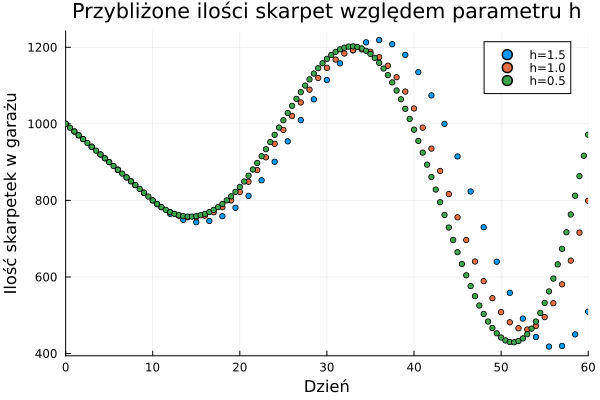

In [28]:
x_values_h1, y_values_h1 = solve_by_rk4(f, g, τ, I₀, day_start, day_end, 1.5)
x_values_h2, y_values_h2 = solve_by_rk4(f, g, τ, I₀, day_start, day_end, 1.0)
x_values_h3, y_values_h3 = solve_by_rk4(f, g, τ, I₀, day_start, day_end, 0.5)

scatter(x_values_h1, y_values_h1, label="h=1.5", markersize=3, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Przybliżone ilości skarpet względem parametru h", grid=true, xlims=(day_start, day_end))
scatter!(x_values_h2, y_values_h2, label="h=1.0", markersize=3)
scatter!(x_values_h3, y_values_h3, label="h=0.5", markersize=3)

Sukces! Pierwszą różnicą, która rzuca się w oczy w porównaniu do poprzedniego wykorzystania algorytmu RK4 jest to, że różnice $h=0.5$ wpływają już znacząco na nasz wynik. Cała metoda natomiast wygląda, aby działała sprawnie. Porównajmy zatem implementację obu metod dla współczynnika $h = 0.5$.

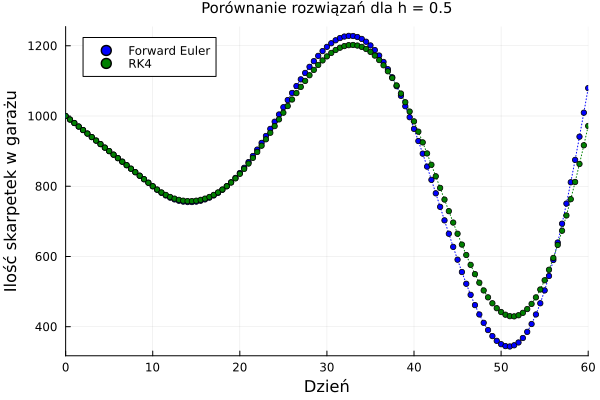

In [29]:
h = 0.5 # Compare with the same 'h' value

x_values_forward, y_values_forward = solve_by_forward_euler(f, g, τ, I₀, day_start, day_end, h)
x_values_rk4, y_values_rk4 = solve_by_rk4(f, g, τ, I₀, day_start, day_end, h)

plot(x_values_forward, y_values_forward, label="", color="blue", linestyle=:dot, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Porównanie rozwiązań dla h = 0.5", grid=true, xlims=(day_start, day_end), titlefontsize=10)
plot!(x_values_rk4, y_values_rk4, label="", color="green", linestyle=:dot)

scatter!(x_values_forward, y_values_forward, label="Forward Euler", markersize=3, color="blue")
scatter!(x_values_rk4, y_values_rk4, label="RK4", markersize=3, color="green")

Różnice są spore, nie dajmy się zwieść skali, zatem nie pozostaje nam nic innego niż rozwiązać model analitycznie i odnaleźć zwyciezce.

## Przybliżone rozwiązanie analityczne

### Rozwiązanie dla $t \in [0,\tau)$
Rozwiążemy równanie (38) poprzez obustronne nałożenie całki

$$
\int \frac{dI}{dt} = \int -D_0
$$

$$
\int dI = \int -D_0\ dt
$$

$$
I(t) = D_0t + C, C \in \mathbb{R}
$$

podstawiając warunek początkowy  $I(0) = I_0$ 

$$
\tag{42}
I(t) = I_0 - D_0t,\text{ gdzie } t \in [0, \tau)
$$

Ta funkcja będzie naszym warunkiem początkowym dla rozwiązania ogólnego, bazując się na Maghami $^{[9]}$. Zapiszemy ją jako:
$$
\tag{43}
\phi(t) = I_0 - D_0t,\text{ gdzie } t \in [0, \tau)
$$

### Rozwiązanie dla $t \in [\tau, \infty)$
Aby rozwiązać (40) posłużymy się metodą nieznanych współczynników

Na początek znajdziemy ogólne rozwiązanie równania jednorodnego

$$
\tag{44}
\frac{dI(t)}{dt} + \frac{I(t-\tau)}{T} = 0,
$$

zakładamy że rozwiązanie jest postaci 
$$
\tag{45}
I(t) = Ce^{st},\ \text{gdzie } C,\ s \in \mathbb{C}.
$$

Faktycznym stanem magazynu określanym przez naszą funkcję $I(t)$ będzie jej rzeczywista część.
Zatem podstawiając to do naszego równania różniczkowego otrzymujemy wielomian charakterystyczny:

$$
\begin{align*}
Cse^{st} + \frac{Ce^{s(t-\tau)}}{T}=0 \\
Ce^{st}(s+\frac{e^{-s\tau}}{T})=0\\
s+\frac{e^{-s\tau}}{T} = 0.
\end{align*}
$$

Mając go, wykonamy kilka prostych przeształceń algebraicznych

$$
\begin{align*}
s = \frac{e^{-s\tau}}{T}\\
se^{{s\tau}} = \frac{1}{T}\\
\tag{46}
s\tau e^{{s\tau}} = \frac{\tau}{T}.
\end{align*}
$$

Doprowadziliśmy do postaci, gdzie możemy użyć funkcji W Lamberta: $W:\mathbb{C} \rightarrow \mathbb{C}$. Jest ona funkcją odwrotną do

$$
\tag{47}
f(w) = we^w\ ,\text{gdzie } w \in \mathbb{C}.
$$
Zatem zachodzi
$$
\tag{48}
W(z)e^{W(z)}=z ,\text{gdzie } z \in \mathbb{C}.
$$

Takie równanie ma nieskończenie wiele rozwiązań w przestrzeni liczb zespolonych, każde oznaczone jako $W_k(z)$, gdzie $k \in \mathbb{Z}$ oznacza dane odgałęzienie rozwiązań. Porównując ze sobą wzory (46) i (48), wnioskujemy, że:
$$
\tag{49}
W_k(z) = s_k\tau \text{ oraz } z = -\frac{\tau}{T}.
$$

To prowadzi nas do

$$
\tag{50}
s_k = \frac{W_k(-\frac{\tau}{T})}{\tau}.
$$

Podstawiając to do (45)

$$
\tag{51}
I_k(t) = C_k e^{s_kt}
$$

Otrzymujemy zatem rozwiązanie naszego równania jednorodnego zależne od wybory gałęzi funkcji W Lamberta. $s_k$ jest znanym zespolonym współczynnikiem, zaś $C_k$ zespoloną stałą całkowania.

Dla uproszenia przyjmiemy, że nasze rozwiązania należą do głównej gałęzi $W_0(z)$, co zostało uzasadnione w pracach Warburtona $^{[10]}$, że jest to dostatecznie dobre przybliżenie do naszych praktycznych zastosowań. Warto wspomnieć że $W_0(z)$ posiada rzeczywiste rozwiązania dla $z \in [-\frac{1}{e},0]$. Dalej zastosujemy następujące oznaczenia:

$$
W(z) = W_0(z) ,\quad s = s_0 ,\quad C = C_0.
$$

Mamy więc określone $s$ do naszego jednorodnego rozwiązania:
$$
\tag{52}
I(t) = C e^{st} = C e^{\frac{W(-\tau/T)}{\tau}t},\ \text{dla } t \in [\tau, \infty).
$$

Mamy już rozwiązanie równania jednorodnego, więc potrzeba tylko szczególnego rozwiązania równania (40), które oznaczymy $I_p \in \mathbb{R}$. Wstępnie przyjmujemy, że jest ono takiej samej postaci jak prawa strona (40), czyli stała:

$$
\begin{equation}
\tag{53}
I_p = A,\ \text{gdzie } A \in \mathbb{R}.
\end{equation}
$$

Rozwiązanie będące stałą, jest już podane dla jednorodnego, zachodzi to jednak tylko dla $t=0$, a taki przypadek nas w tym momencie nie dotyczy. Możemy zatem podstawić to do równania (40):

$$
\frac{A}{T} = \frac{I_t}{T} - D_0,
$$

$$
\tag{54}
A = I_t - D_0T.
$$
Otrzymaliśmy zatem rozwiązanie szczególne

$$
\tag{55}
I_p = I_t - D_0T.
$$

Mając ogólne rozwiązanie równania jednorodnego (52), jak i szczególne rozwiązanie niejednorodnego (55), możemy zapisać ogólne rozwiązanie równania (40) jako:

$$
\tag{56}
I(t) = I_t - D_0T + C e^{\frac{W(-\tau/T)}{\tau}t},\ \text{dla } t \in [\tau, \infin)
$$
Została nam tutaj jedynie do wyznaczenia stała całkowania $C \in \mathbb{C}$.

### Dopasowanie wyników
Chcemy teraz upewnić się że wszystko jest na swoim miejscu. Chcemy dopasować rozwiązanie (40) jak i rozwiązanie (56), które są w przedziałach odpowiednio $t \in [0,\tau)$ i $t \in [\tau,\infin)$ tak aby były ciągle w punkcie $t=\tau$. Zadbamy również o zgodność na poziomie pierwszej pochodnej, aby zmiana też była ciągła.

Przypomnijmy sobie, że już w równaniu (8) uwzględniając równanie (3) określiliśmy jak ma wyglądać pochodna naszego wyniku w lewym i prawym przedziale od $t=\tau$.

$$
\frac{dI}{dt} = R(t) - D(t) = O(t - \tau) - D(t).
$$
Mamy więc
$$
\tag{57}
\lim_{t \to \tau^-} O(t - \tau) - D(t) = -D_0.
$$

gdyż na przedziale $t \in [0,\tau)$ $O(t)=0$. Dalej

$$
\tag{58}
\lim_{t \to \tau^+} O(t - \tau) - D(t) = \lim_{t \to \tau^+} \frac{I_t - I(t-\tau)}{T} - D(t) = \frac{I_t - I(0)}{T} - D_0 = \frac{I_t - I_0}{T} - D_0
$$

Wiemy że dla $t \in [\tau,\infin)$ $O(t)$ ma już określoną wartość (9). Przyrównując do siebie obydwa równania zauważamy że pochodna będzie ciągła w punkcie $t=\tau$ jeśli $I_t= I_0$. W wielu przypadkach będziemy właśnie zaczynali od stanu magazynu który chcielibyśmy stale utrzymywać.

Wróćmy do naszego otrzymanego wyniku. Określimy wartości jakie osiągają (40) i (56) zbiegając do $t=\tau$ odpowiednio z lewej i prawej strony oraz jak wyglądają pochodne w tych przedziałach

Lewa granica dla (40) i $ t \in [0,\tau) $

$$
\begin{split}
I_L &= \lim_{t \to \tau^-} I_0 - D_0t = I_0 - D_0\tau \\
\partial I_L &= \lim_{t \to \tau^-} \frac{d}{dt}(I_0 - D_0t) = -D_0 \\
\end{split}
$$

Prawa granica dla (56) i $t \in [\tau,\infin)$

$$ 
\begin{split}
I_R &= \lim_{t \to \tau^+} I_t - D_0T + C e^{\frac{W(-\tau/T)}{\tau}t} = I_t - D_0T + C e^{W(-\tau/T)}\\
\partial I_R &= \lim_{t \to \tau^+}\frac{d}{dt} (I_t - D_0T + C e^{\frac{W(-\tau/T)}{\tau}t}) = \lim_{t \to \tau^+}  C\frac{W(-\tau/T)}{\tau} e^{\frac{W(-\tau/T)}{\tau}t} = \frac{CW(-\tau/T)}{\tau} e^{W(-\tau/T)}
\end{split}
$$

Porównamy teraz ze sobą lewą i prawą stronę naszego rozwiązania w stosunku do $\tau$ 

$$
\begin{split}
I_L &= I_R \\
I_0 - D_0\tau &= I_t - D_0T + C e^{W(-\tau/T)} \\
C e^{W(-\tau/T)} &= I_0 - D_0\tau - I_t + D_0T
\end{split}
$$

Jeśli chodzi o pochodne, to możemy zauważyć że dla $ t \in [0,\tau) $ (56) jest równa $\partial I_L$. Została tylko (58) i $\partial I_R$

$$
\begin{split}
\frac{CW(-\tau/T)}{\tau} e^{W(-\tau/T)} &= \frac{I_t - I_0}{T} - D_0\\
CW(-\tau/T) e^{W(-\tau/T)} &= (\frac{I_t - I_0}{T} - D_0)\tau
\end{split}
$$

Otrzymujemy końcowo układ równań z którego możemy wyciągnąć wnioski dotyczące $C$

$$
\begin{cases}
C e^{W(-\tau/T)} &= I_0 - D_0\tau - I_t + D_0T\\
CW(-\tau/T) e^{W(-\tau/T)} &= (\frac{I_t - I_0}{T} - D_0)\tau
\end{cases}
\tag{59}
$$

Dla ułatwienia zapiszemy sobie nasze liczby zespolone $C$ i $W$ w postaci sumy:

$$
C = \alpha + i\beta : \alpha\ ,\beta \in \mathbb{R}
\tag{60}
$$
$$
W(-\tau/T) = a+ib : a,\ b \in \mathbb{R}
\tag{61}
$$

Oznaczymy sobie też prawą część równania (59):
$$
\begin{align*}
&L_0 = I_0 - D_0\tau - I_t + D_0T\\
&L_1 = (\frac{I_t - I_0}{T} - D_0)\tau
\end{align*}
$$

Mamy zatem
$$
\begin{cases}
(\alpha + i\beta)e^{a+ib} &= L_0\\
(\alpha + i\beta)(a+ib)e^{a+ib} &= L_1
\end{cases}
\tag{62}
$$

Przypomnimy sobie, że potrzebujemy tylko rzeczywistej części rozwiązania, możemy sobie zatem uprościć lewą stronę

$$
\begin{cases}
\text{Re}((\alpha + i\beta)e^{a+ib})\\
\text{Re}((\alpha + i\beta)(a+ib)e^{a+ib})
\end{cases}
\implies
\begin{cases}
e^a (\alpha\cos{b}-\beta \sin{b})\\
e^a (\alpha(a\cos{b}-b\sin{b})-\beta(a\sin{b}+b\cos{b}))
\end{cases}
$$

Podstawiając to spowrotem do równania otrzymujemy
$$
\begin{cases}
e^a (\alpha\cos{b}-\beta \sin{b}) &= L_0\\
e^a (\alpha(a\cos{b}-b\sin{b})-\beta(a\sin{b}+b\cos{b})) &= L_1
\end{cases}
$$

Zatem jako wynik otrzymujemy 

$$
\alpha = \frac{L_0(b\cos{b} + a\sin{b})-L_1\sin{b}}{e^a b}\\
\beta = \frac{L_0(b\cos{b} + a\sin{b})-L_1\sin{b}}{e^a b}
$$

Bardzo ważne jest tutaj zauważenie, że dla $0 \lt \tau/T \le 1/e$ współczynnik $b$ znika gdyż na tym przedziale $W(\tau/T)$ przyjmuje tylko rzeczywiste wartości. Uwzględniając to w (62) otrzymamy równanie

$$
\begin{cases}
\alpha e^a = L_0\\
\alpha a e^a  = L_1
\end{cases}
$$

Widać że współczynnik $\beta$ jest tutaj nieobecny, zatem rozwiążemy tylko dla współczynnika $\alpha$

$$
\alpha = \frac{L_0}{e^a}
$$
$$
\alpha  = \frac{L_1}{ae^a}
$$

Te równania mogą być spełnione jednocześnie, gdy
$$
L_1 = L_0a.
$$

Warunek ten nie zawsze może być spełniony, jeśli nie będziemy mogli dostosować sobie zmiennych początkowych. Skutkuje to tym że w przypadkach  $0 \lt \tau/T \le 1/e$ krzywa równania nie może być dopasowana dla $t=\tau$, jedynie stan magazynu może być ustalony. To przewiduje błędy, które przeanalizujemy w przykładach.

Zatem finalnie mamy dla $ \tau/T \gt 1/e$

$$
C = \frac{L_0(b\cos{b} + a\sin{b})-L_1\sin{b}}{e^a b} + i(\frac{L_0(b\cos{b} + a\sin{b})-L_1\sin{b}}{e^a b}),
\tag{63}
$$

a dla $0 \lt \tau/T \le 1/e$

$$
C = \frac{L_0}{e^a},
\tag{64}
$$

gdzie

$$
W = (a + ib).
$$

To podstawiamy do wyniku
$$
\tag{65}
I(t) = I_t - D_0T + C e^{\frac{W(-\tau/T)}{\tau}t},\ \text{dla } t \in [\tau, \infin)
$$

My potrzebujemy część rzeczywistą, więc ostatecznie 

$$
\tag{66}
I(t) = I_t - D_0T + \text{Re}( C e^{\frac{W(-\tau/T)}{\tau}t}),\ \text{dla } t \in [\tau, \infin)
$$

### Wykres Analityczny


In [34]:
using LambertW

# additional declarations
W = lambertw(-τ/T +0im)
L₀ = I₀ - Iₜ + D₀*T - D₀*τ
L₁ = ((Iₜ-I₀)/T - D₀)*τ

-200.0

In [35]:
"""
    get_C(W,L₀,L₁)

Returns a complex number esential to our inventory model equation

Parameters:
- `W`: result of the Lambert W₀(z) function for z=-τ/T 
- `L₀`: Constant described in the analytic solution
- `L₁`: Constant described in the analytic solution

Returns:
- A complex number 
"""
function get_C(
    W::Complex,
    L₀:: Int,
    L₁:: Float64
)::Complex
    a = real(W)
    b = imag(W)
    α = (L₀*(b*cos(b)+ a *sin(b)) - L₁*sin(b))/(exp(a)*b)
    β = ((L₀*(a*cos(b)+ a *sin(b)) - L₁*sin(b))/(exp(a)*b))
    return  α + β*im
end

get_C(W,L₀,L₁)

80.0 + 67.01054554204605im

In [40]:
"""
    solve_by_analytical_solution(
        Iₜ::Int,
        τ::Int,
        T::Int,
        D₀::Int,
        C::Complex,
        y₀::Number,
        x₀::Int,
        xₙ::Int,
        h::Float64,
    )::Tuple{Vector{Float64}, Vector{Float64}}

Approximates the solution of a delayed ordinary differential equation using an analytical method.

Parameters:
- `Iₜ`: Target value.
- `τ`: Delay value.
- `T`: Order policy controller value.
- `D₀`: Delivery constant.
- `C::Complex`: Complex constant obtained from the Lambert W function.
- `y₀`: Initial condition.
- `x₀`: Lower bound for x, where x ∈ [x₀, xₙ]
- `xₙ`: Upper bound for x, where x ∈ [x₀, xₙ] 
- `h`: Step size

Returns:
- `x_values`: Array with x values corresponding to each step.
- `y_values`: Array with approximated values of the given function.
"""
function solve_by_analytical_solution(
    Iₜ::Int,
    τ::Int,
    T::Int,
    D₀::Int,
    C::Complex,
    y₀::Number,
    x₀::Int,
    xₙ::Int,
    h::Float64,
)::Tuple{Vector{Float64}, Vector{Float64}}
    
    W = lambertw(-τ/T +0im)

    n = round(Int, (xₙ - x₀) / h)

    y_values = zeros(n + 1)
    x_values = zeros(n + 1)

    x_values[1] = x₀
    y_values[1] = y₀

    for index in 1:n
        if index < τ
            x_values[index + 1] = x_values[index] + h
            y_values[index + 1] = I₀ -D₀*x_values[index + 1]
        else
            x_values[index + 1] = x_values[index] + h
            y_values[index + 1] = Iₜ -D₀*T+real(C*exp(W/τ*x_values[index+1]))
        end
    end

    return x_values, y_values
end

solve_by_analytical_solution

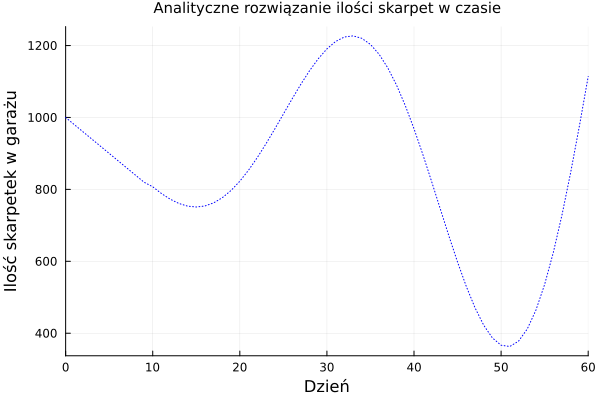

In [41]:
x_values_analytic_delay, y_values_analytic_delay = solve_by_analytical_solution(Iₜ,τ,T,D₀,get_C(W,L₀,L₁),I₀,day_start,day_end,1.0)
plot(x_values_analytic_delay, y_values_analytic_delay, label="", color="blue", linestyle=:dot, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Analityczne rozwiązanie ilości skarpet w czasie", grid=true, xlims=(day_start, day_end), titlefontsize=10)

## Podsumowanie
Jakie więc wyniki możemy otrzymać? Zależy to od tego jakie przyjmiemy warunki początkowe. Najlepszą sytuacją jest gdy $I_t = I_0$, wtedy mamy ciągłość w punkcie $t=\tau$. Ominąć możemy ten przypadek jeśli dla $I_t \ne I_0$ przyjmiemy
$$
L_1 = -D_0\tau
$$
Zauważymy też że funkcja różnie zachowuje się w zależności gdzie pada $\tau/T$. Jeśli jest większe od $1/e$ to nasza funkcja będzie oscylować.
Zaś gdy $\tau/T$ wpada do przedziału $[0,1/e]$ to wynik się wystabilizuje do stałego deficytu od $I_t$ wynoszący $D_1T$.


## Literatura
- [1] - Arpad Gy. T. Csik, Tamas L. Horvath, Peter Foldesi,<i> An Approximate Analytic Solution of the Inventory
Balance Delay Differential Equation</i>. Acta Technica Jaurinensis Vol. 3 No. 3 2010
- [2] - Properties  of priodyc review
- [3] - Disney towil 2000
- [4] - https://www.post.japanpost.jp/service/you_pack/current_day_en.html
- [5] - ten pdf z krakowa md5
- [6] - https://phys23p.sl.psu.edu/~mrg3/mathanim/diff_equ/eulera.html
- [7] - https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#/media/File:Runge-Kutta_slopes.svg
- [8] - https://youtu.be/C_WsQeOjbV4?si=lH_PkdEOAo52h-UH
- [9] - maghami analyses of system
- [10] - R. D. H. Warburton. <i> An analytical investigation of the bullwhip effect</i>. Production and Operations Management, 13(2):150-160,2005


